## Grit Search

Single Layer, 4 nuerons in first hidden
Best learning rate: 0.7, Best epoch: 1347


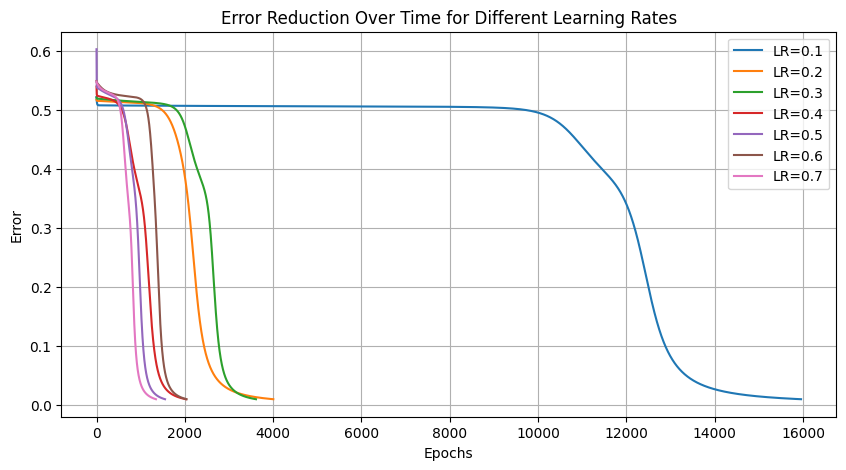

Single Layer, 6 nuerons in first hidden
Best learning rate: 0.7, Best epoch: 1409


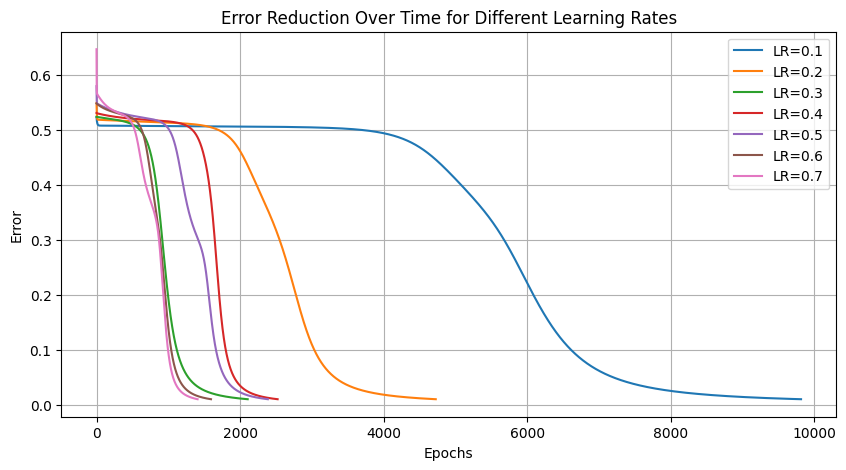

Single Layer, 8 nuerons in first hidden
Best learning rate: 0.7, Best epoch: 999


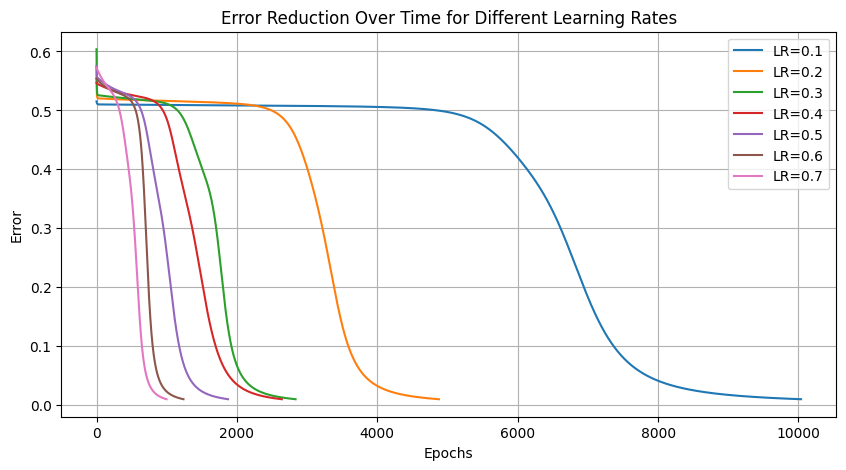

Single Layer, 10 nuerons in first hidden
Best learning rate: 0.7, Best epoch: 1183


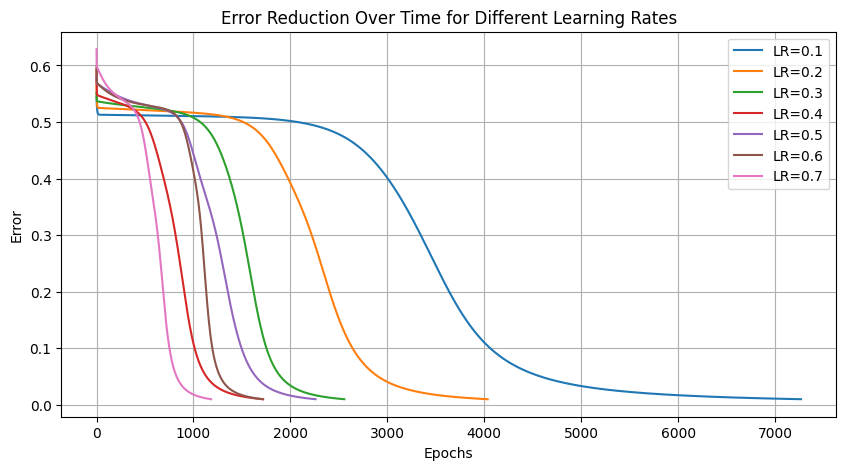

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def initialize_network(layer_sizes):
    weights = []
    for i in range(len(layer_sizes) - 1):
        weight = np.random.rand(layer_sizes[i + 1], layer_sizes[i] + 1) - 0.5
        weights.append(weight)
    return weights

def forward_pass(inputs, weights):
    activations = [np.append(inputs, -1)]  # Add bias
    for weight in weights[:-1]:
        activation = sigmoid(np.dot(weight, activations[-1]))
        activations.append(np.append(activation, -1))  # Add bias
    final_activation = sigmoid(np.dot(weights[-1], activations[-1]))
    activations.append(final_activation)
    return activations

def backward_pass(desired, activations, weights, learning_rate):
    errors = [desired - activations[-1]]
    deltas = []
    for i in reversed(range(len(weights))):
        activation = activations[i + 1]
        if i != len(weights) - 1:
            activation = activation[:-1]  # Remove bias term for hidden layers
        delta = errors[-1] * activation * (1 - activation)
        deltas.append(delta)
        error = np.dot(weights[i].T, delta)
        errors.append(error[:-1])  # Remove bias term from propagated error
        weights[i] += learning_rate * np.outer(delta, activations[i])
    return weights

def train_network(inputs, desired, layer_sizes, learning_rate=0.5, max_epochs=50000, desired_error=0.01):
    weights = initialize_network(layer_sizes)
    error_history = []
    epoch = 0
    while(True):
        epoch += 1
        total_error = 0
        for input_pattern, desired_output in zip(inputs, desired):
            activations = forward_pass(input_pattern, weights)
            weights = backward_pass(np.array([desired_output]), activations, weights, learning_rate)
            total_error += 0.5 * np.sum((desired_output - activations[-1]) ** 2)
        error_history.append(total_error)
        if total_error < desired_error:
            break
        if epoch > max_epochs:
            break
    return weights, error_history, epoch

def plot_error_history(error_histories):
    plt.figure(figsize=(10, 5))
    for lr, error_history in error_histories.items():
        plt.plot(error_history, label=f'LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Error Reduction Over Time for Different Learning Rates')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
for nueron in [4, 6, 8, 10]:
  layer_sizes = [3, nueron, 1]  # 3 input, 5 in first hidden, 3 in second hidden, 1 output
  inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
  desired_outputs = np.array([0, 1, 1, 0])
  learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

  best_learning_rate = None
  best_epoch = float("inf")
  error_histories = {}
  final_epochs = {}

  for lr in learning_rates:
    _, error_history, final_epoch = train_network(inputs, desired_outputs, layer_sizes, learning_rate=lr)
    final_epochs[lr] = final_epoch
    error_histories[lr] = error_history
    if final_epoch < best_epoch:
      best_epoch = final_epoch
      best_learning_rate = lr

  print(f"Single Layer, {nueron} nuerons in first hidden")
  print(f"Best learning rate: {best_learning_rate}, Best epoch: {best_epoch}")

  # Plot error histories for each learning rate
  plot_error_history(error_histories)


Two Layer, 4 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 4966


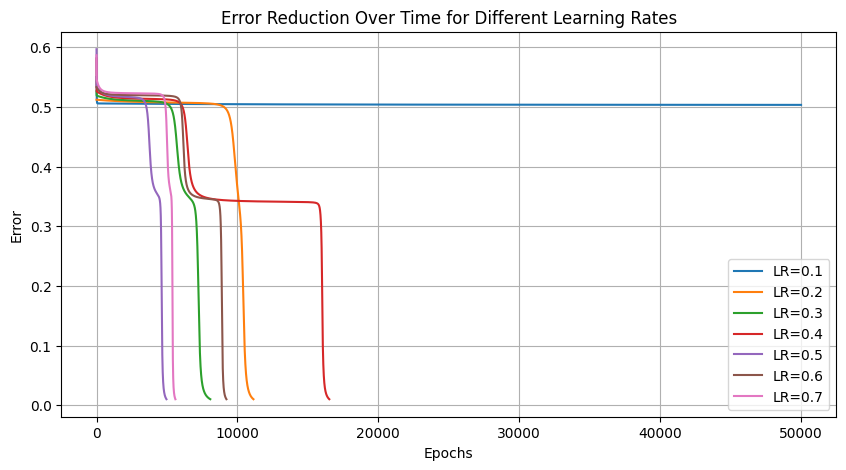

Two Layer, 4 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 4676


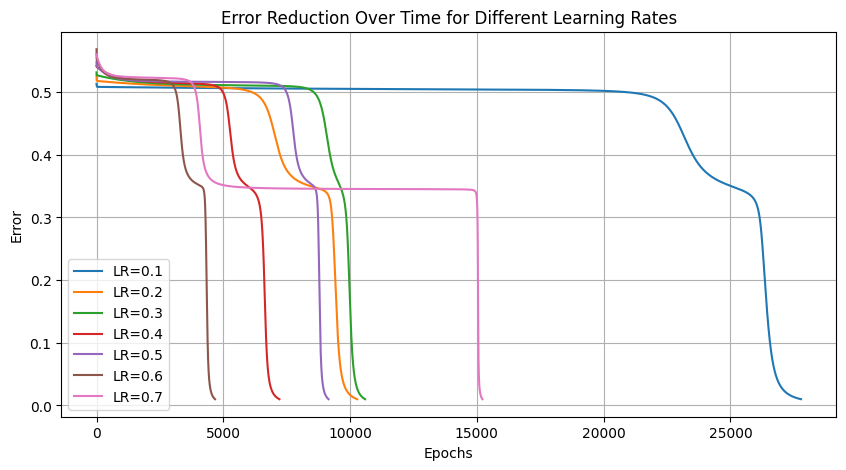

Two Layer, 4 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 4088


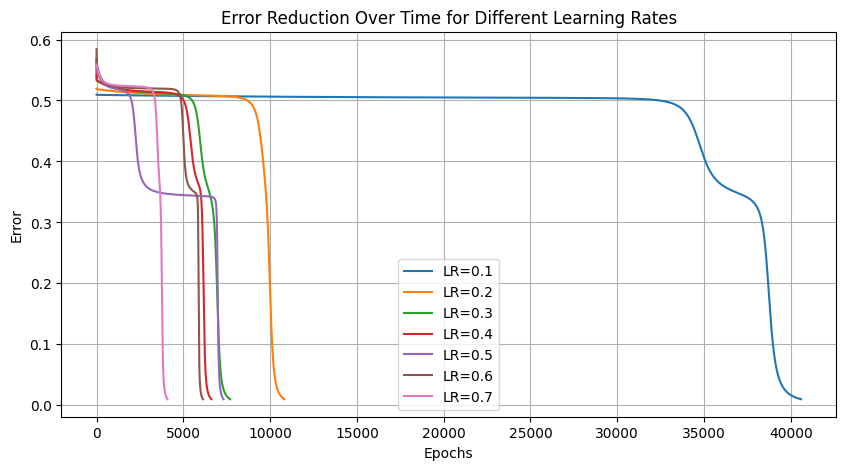

Two Layer, 4 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 2809


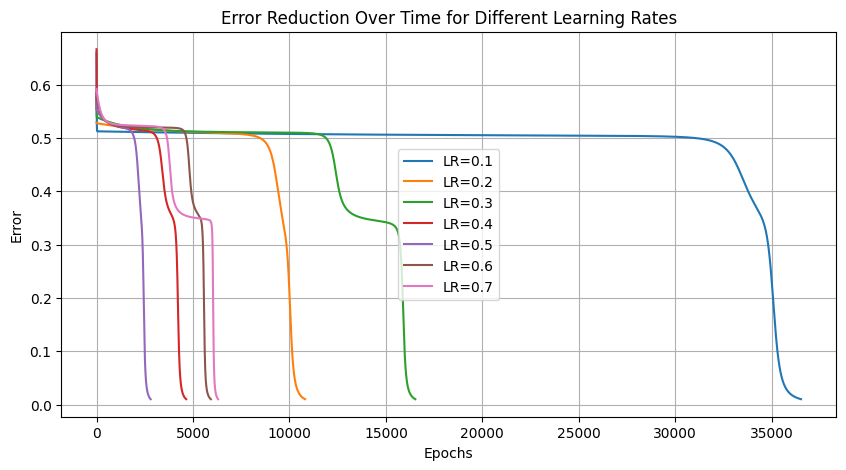

Two Layer, 6 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 8013


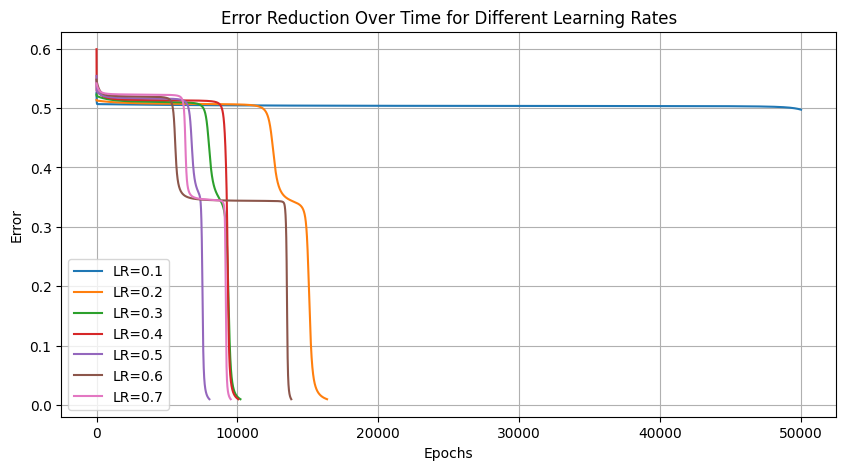

Two Layer, 6 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 3504


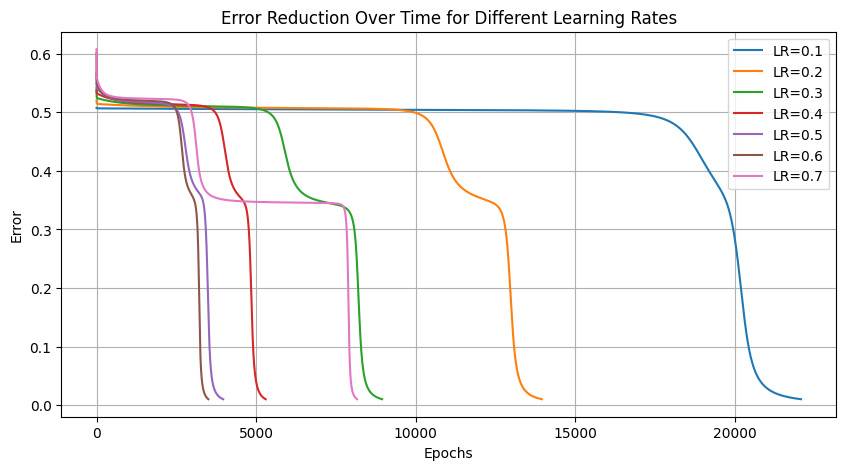

Two Layer, 6 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 4706


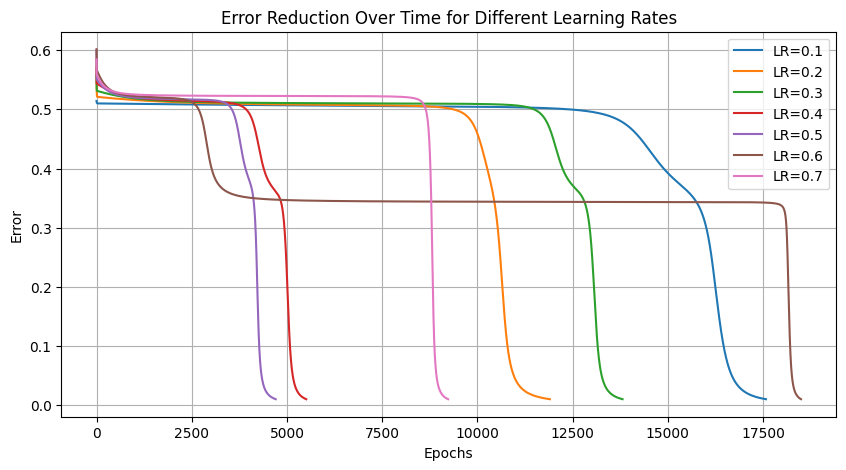

Two Layer, 6 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 3329


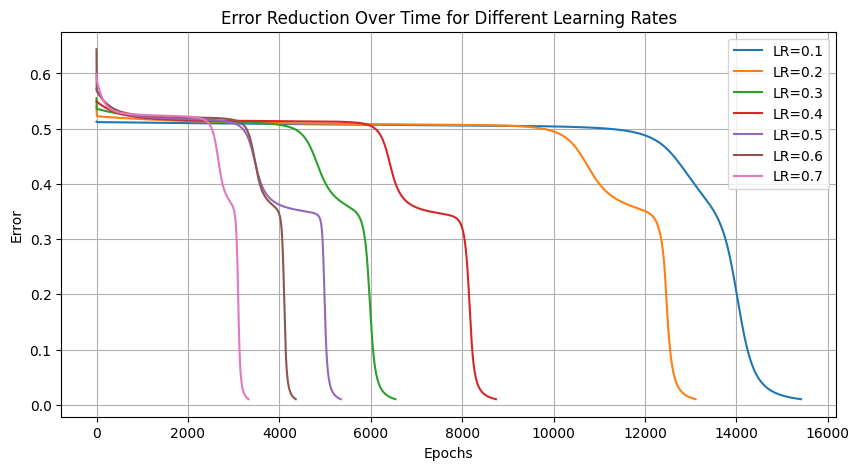

Two Layer, 8 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 4857


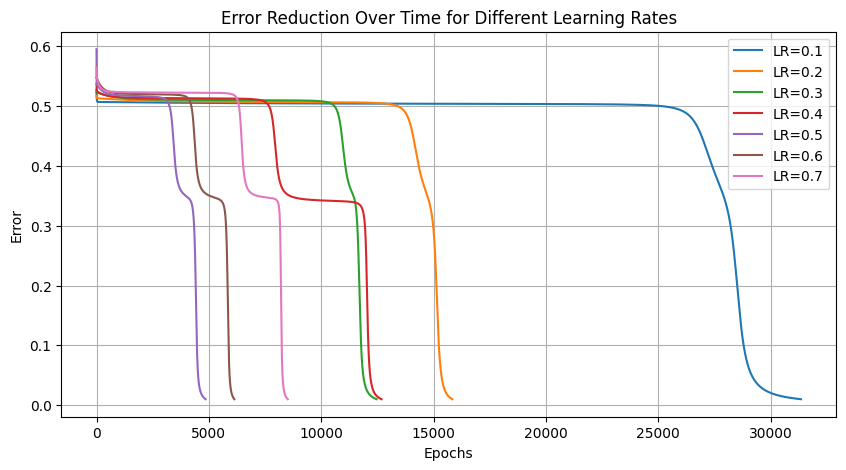

Two Layer, 8 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 5088


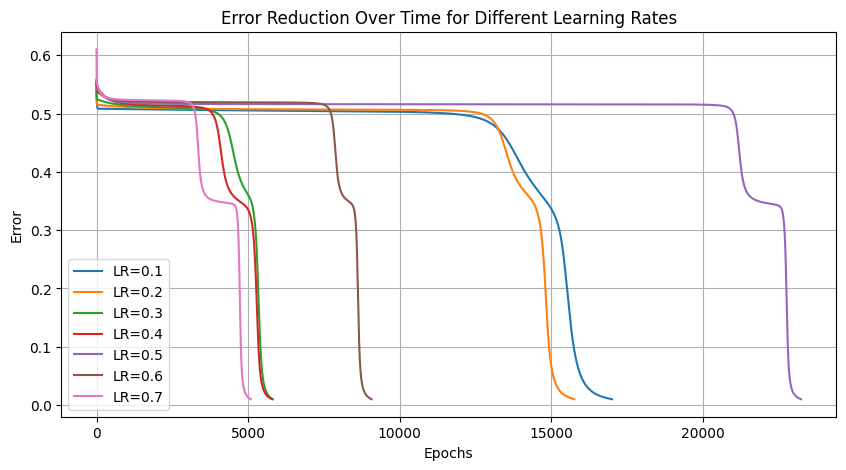

Two Layer, 8 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 3763


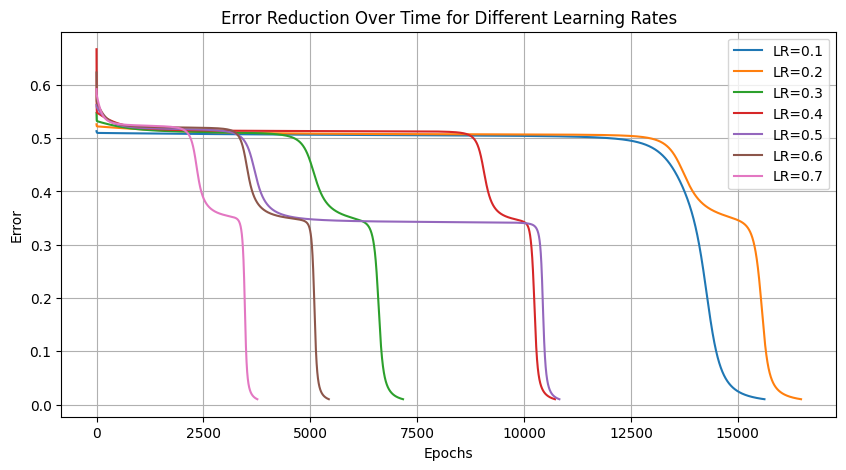

Two Layer, 8 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 2157


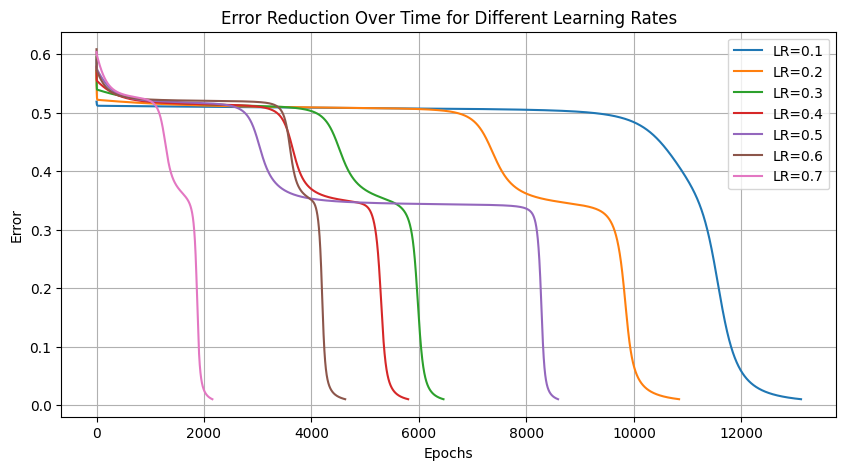

Two Layer, 10 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 2664


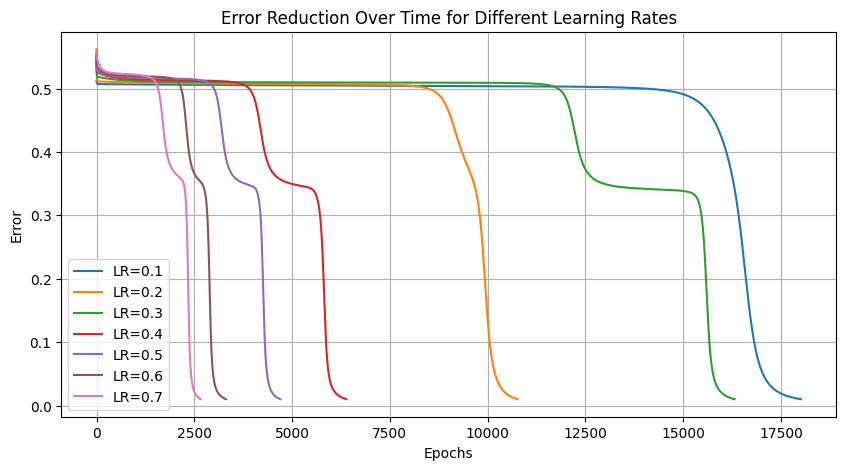

Two Layer, 10 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 3620


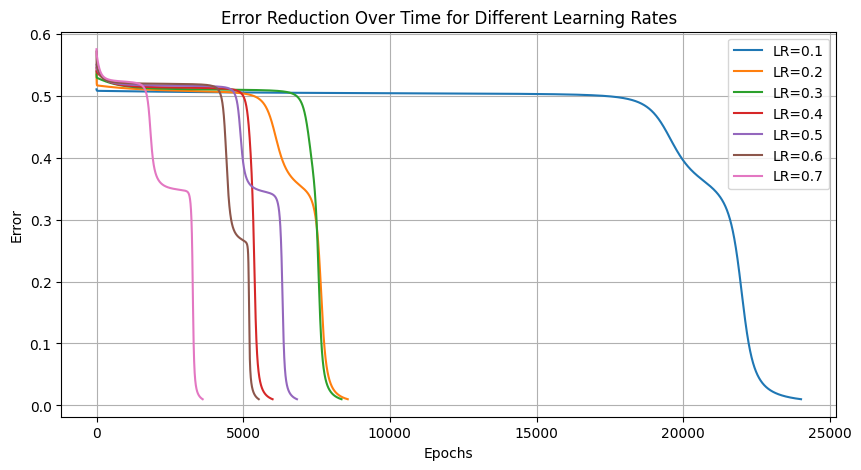

Two Layer, 10 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 3971


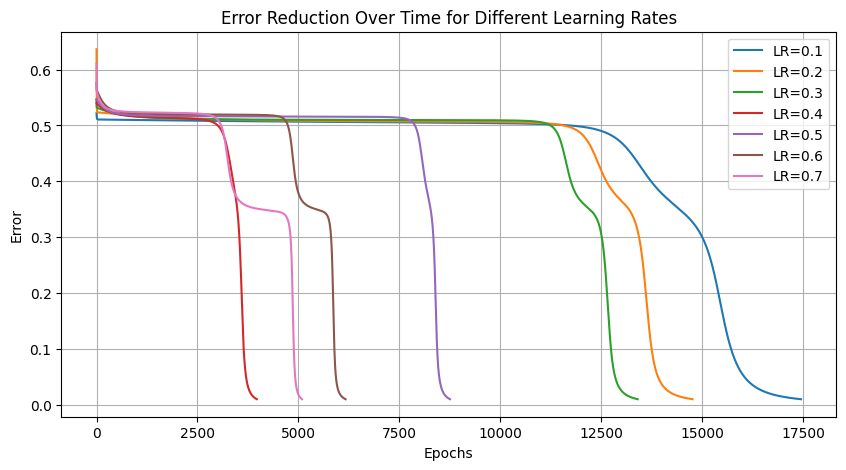

Two Layer, 10 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 3081


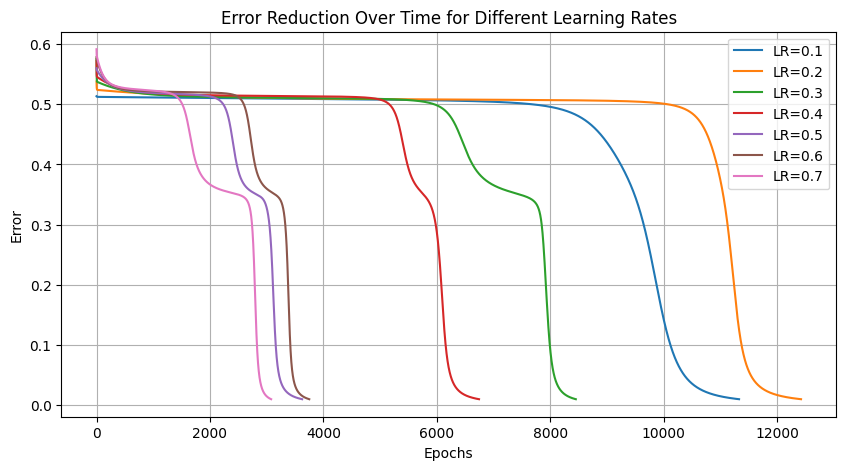

In [ ]:
# Example usage:
for first_nueron in [4, 6, 8, 10]:
  for second_nueron in [4, 6, 8, 10]:
    layer_sizes = [3, first_nueron, second_nueron, 1]  # 3 input, 5 in first hidden, 3 in second hidden, 1 output
    inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
    desired_outputs = np.array([0, 1, 1, 0])
    learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

    best_learning_rate = None
    best_epoch = float("inf")
    error_histories = {}
    final_epochs = {}

    for lr in learning_rates:
        _, error_history, final_epoch = train_network(inputs, desired_outputs, layer_sizes, learning_rate=lr)
        final_epochs[lr] = final_epoch
        error_histories[lr] = error_history
        if final_epoch < best_epoch:
            best_epoch = final_epoch
            best_learning_rate = lr

    print(f"Two Layer, {first_nueron} nuerons in first hidden, {second_nueron} nuerons in second hidden")
    print(f"Best learning rate: {best_learning_rate}, Best epoch: {best_epoch}")

    # Plot error histories for each learning rate
    plot_error_history(error_histories)

Two Layer, 4 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 48041


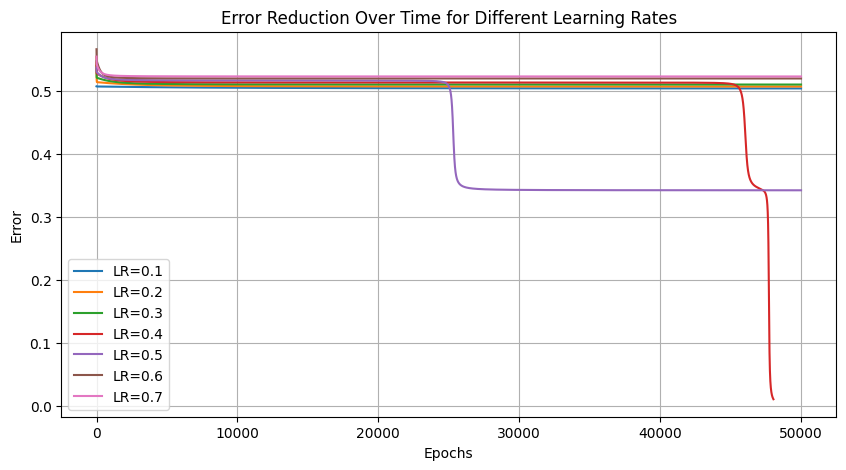

Two Layer, 4 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 40925


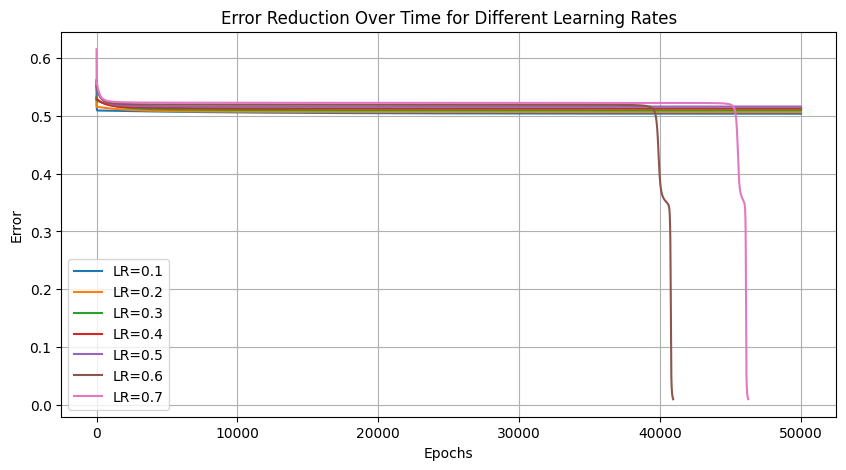

Two Layer, 4 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 15874


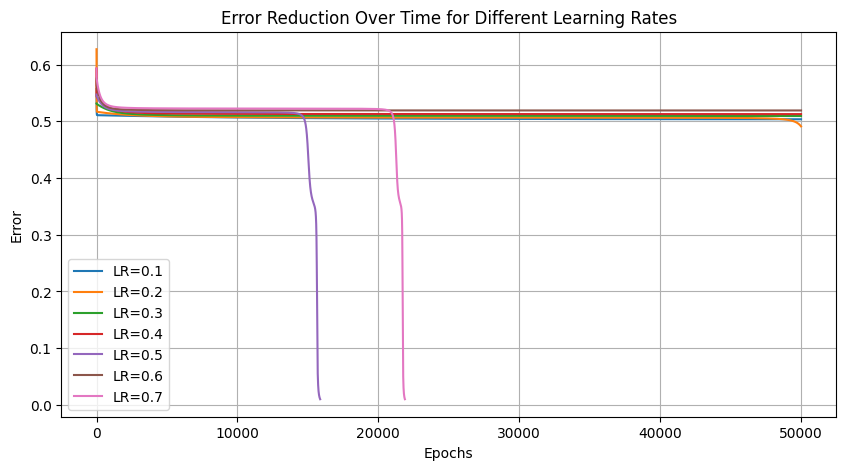

Two Layer, 4 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 11255


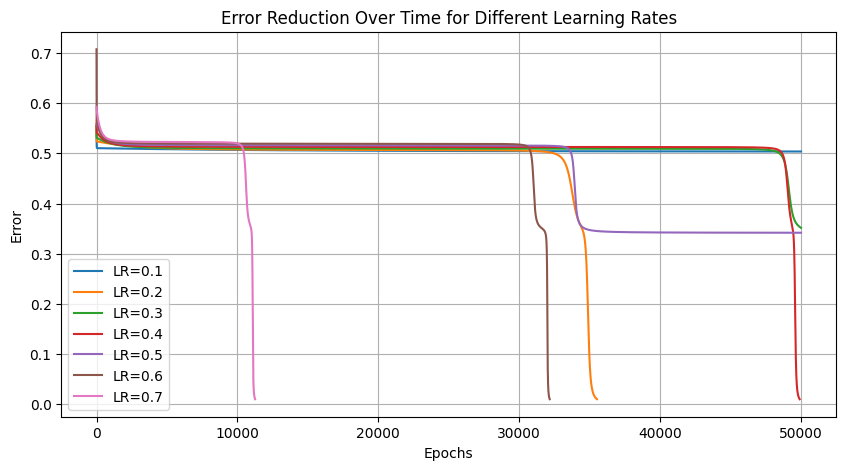

Two Layer, 4 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


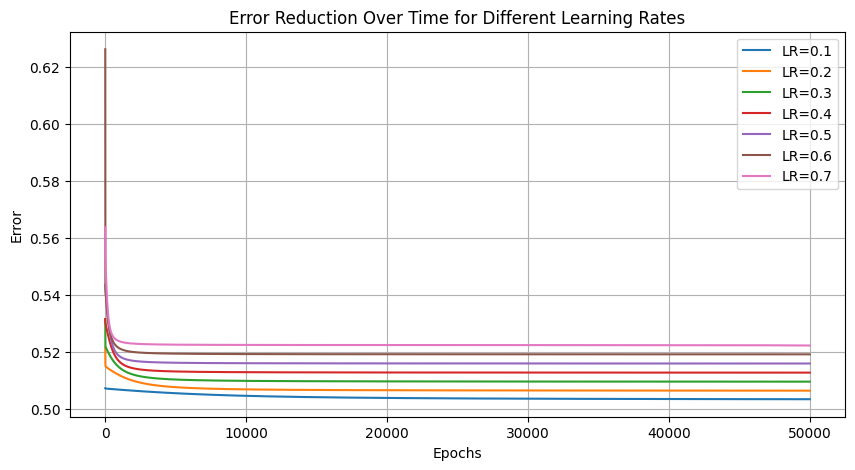

Two Layer, 4 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


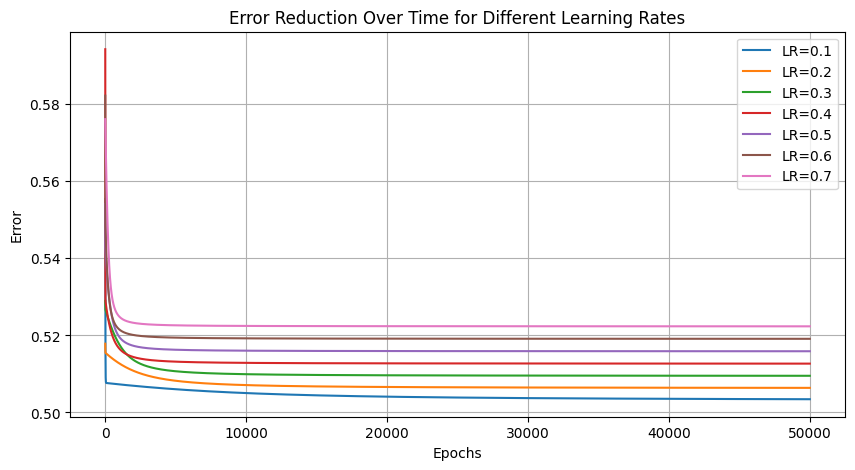

Two Layer, 4 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 15711


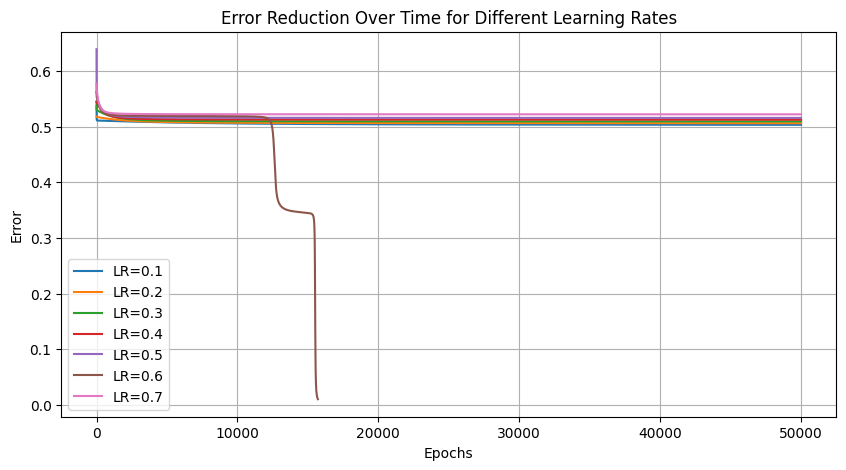

Two Layer, 4 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 29524


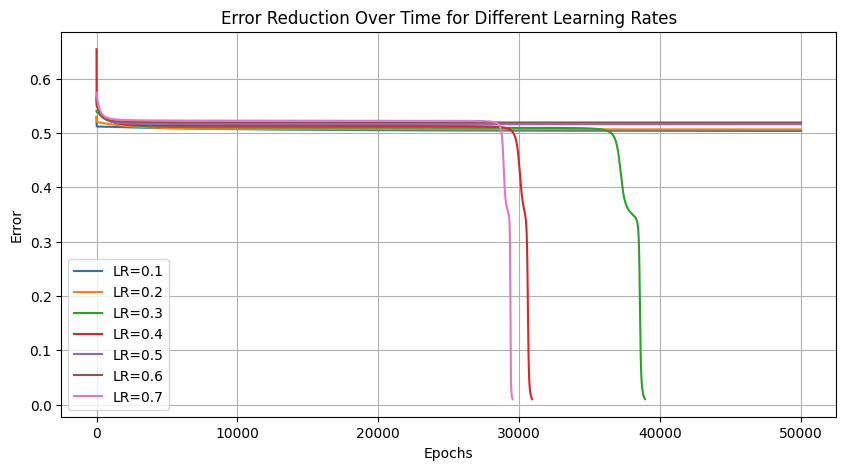

Two Layer, 4 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


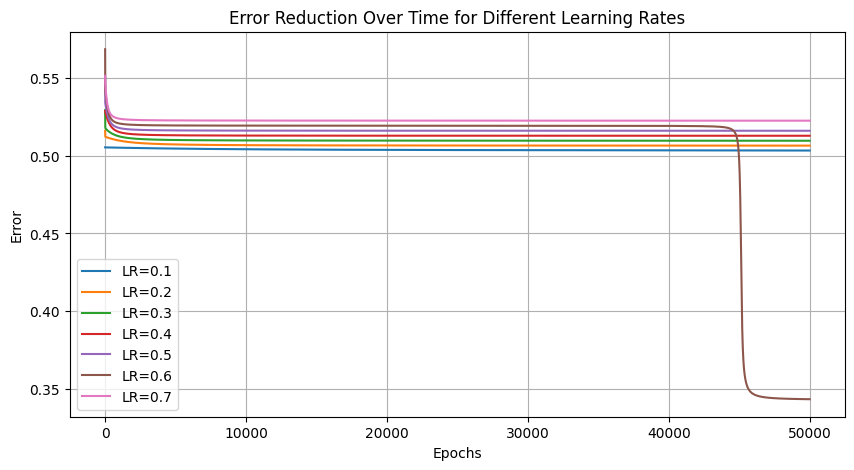

Two Layer, 4 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 36160


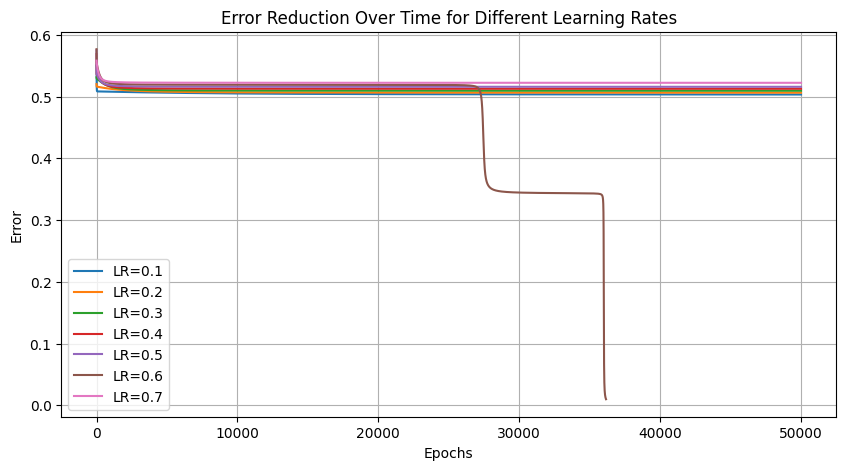

Two Layer, 4 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 40911


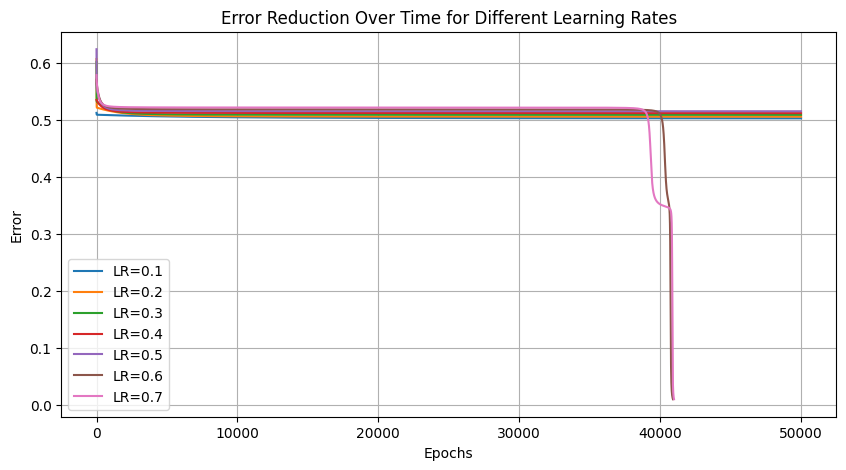

Two Layer, 4 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 24770


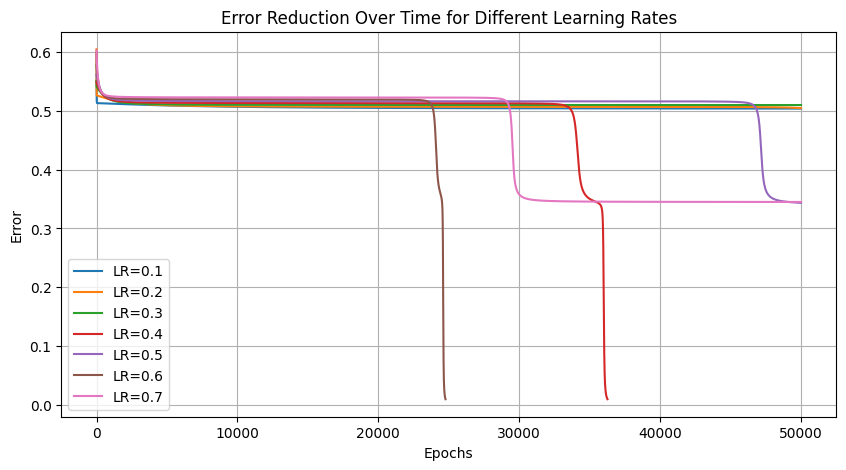

Two Layer, 4 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 43064


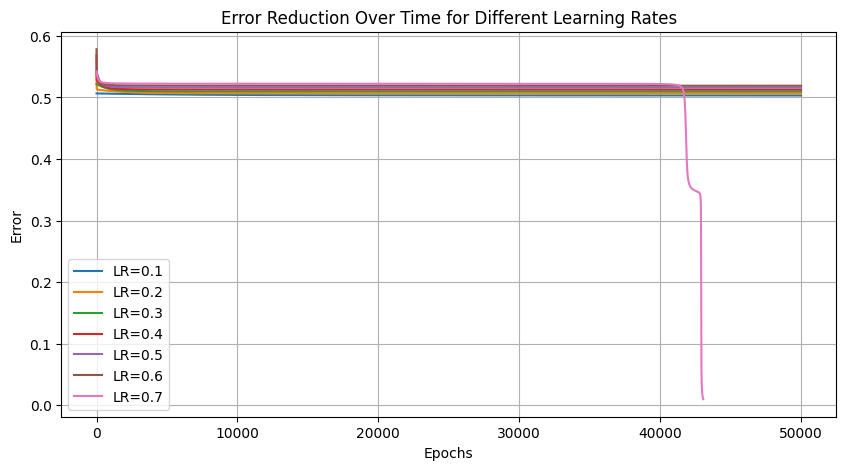

Two Layer, 4 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 42377


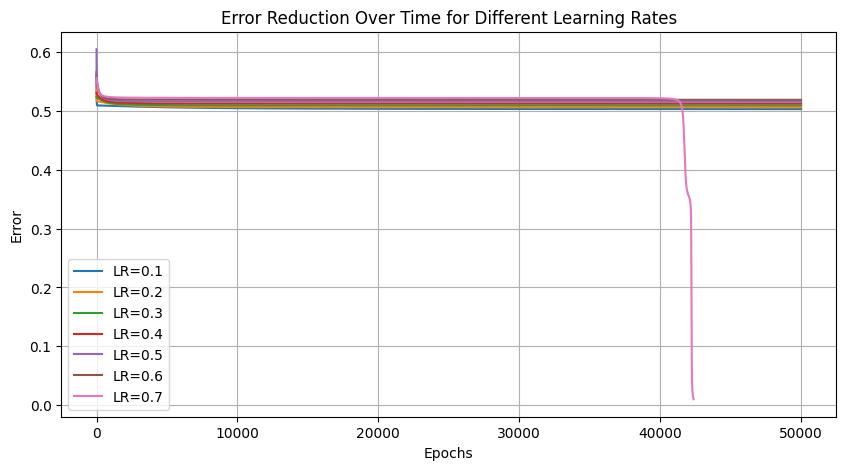

Two Layer, 4 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 30679


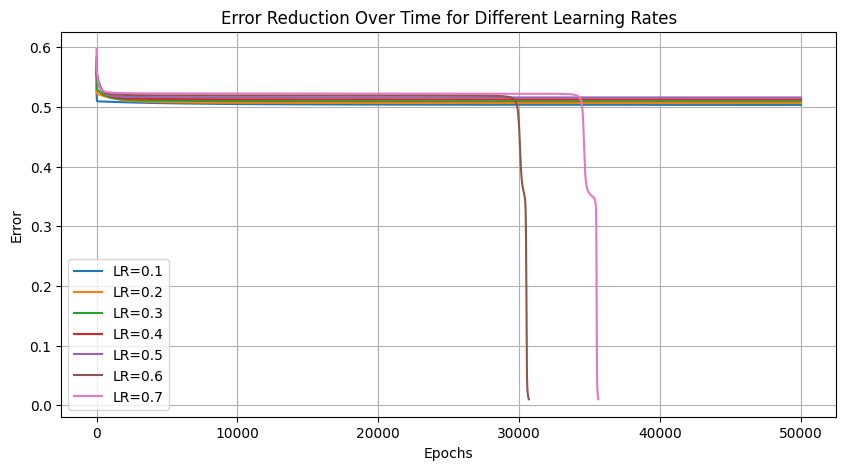

Two Layer, 4 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.3, Best epoch: 19223


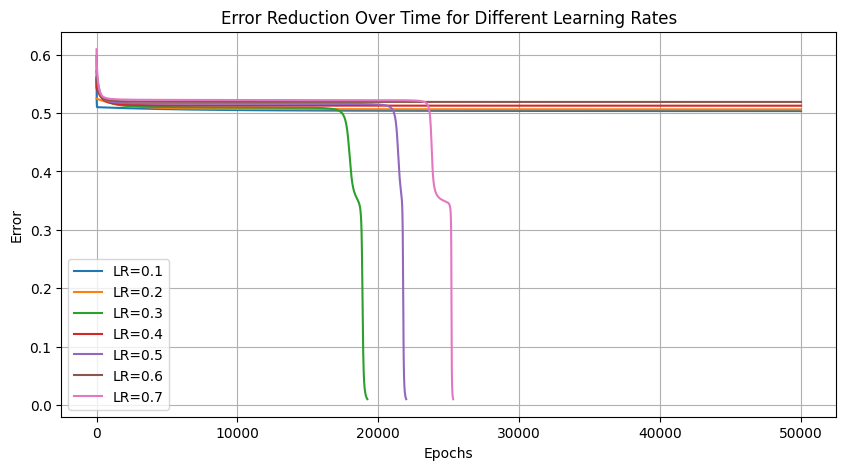

Two Layer, 6 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


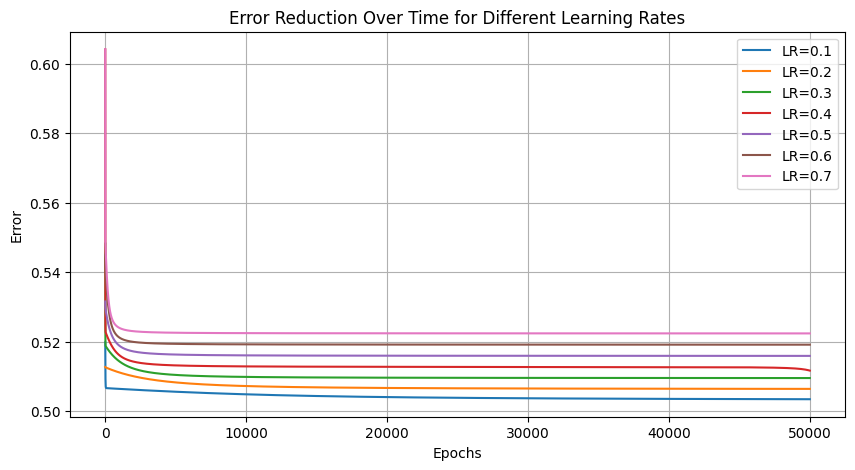

Two Layer, 6 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 43786


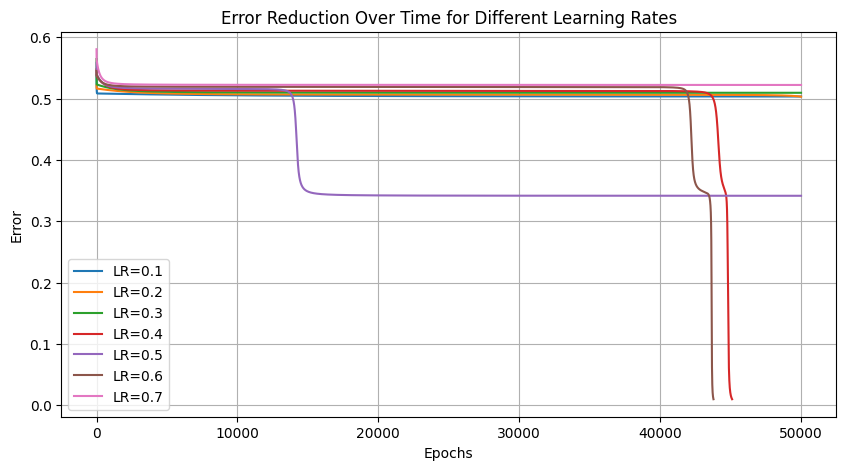

Two Layer, 6 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.2, Best epoch: 45384


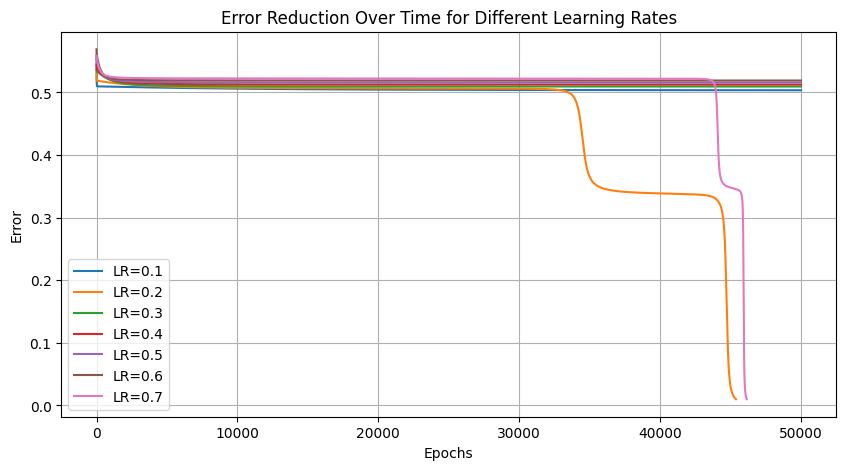

Two Layer, 6 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 18350


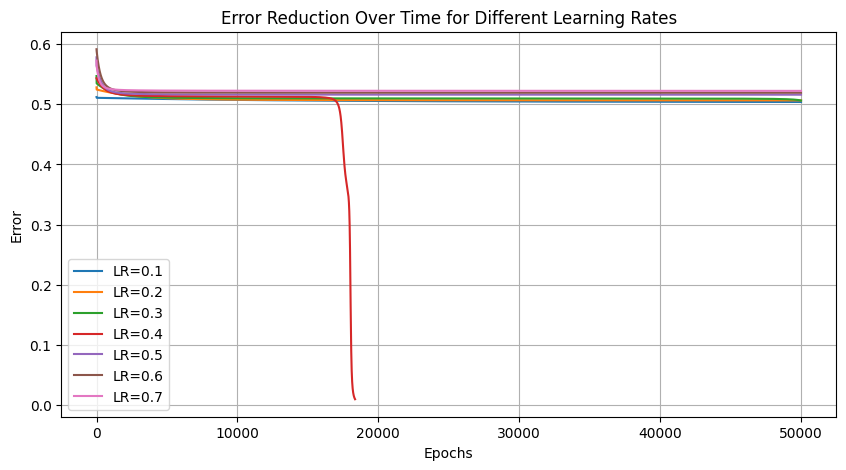

Two Layer, 6 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.3, Best epoch: 34498


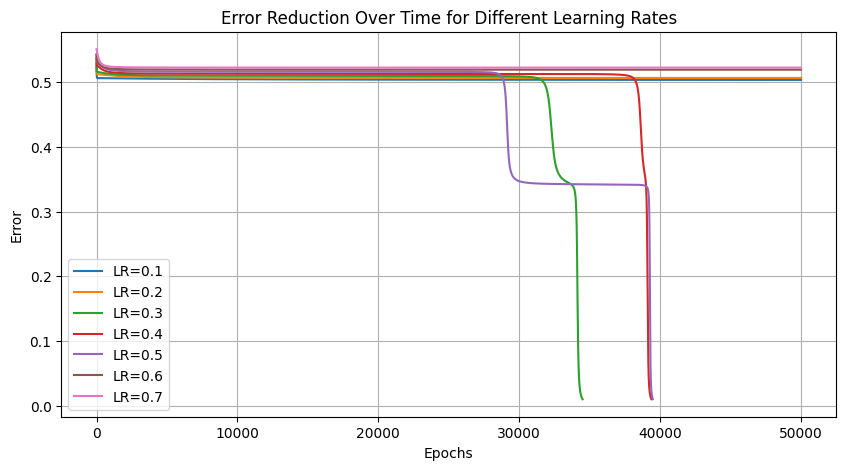

Two Layer, 6 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 22838


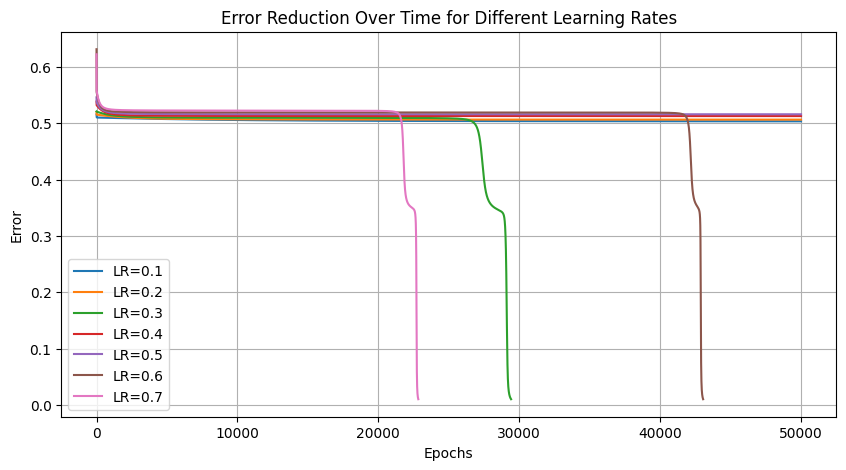

Two Layer, 6 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 15441


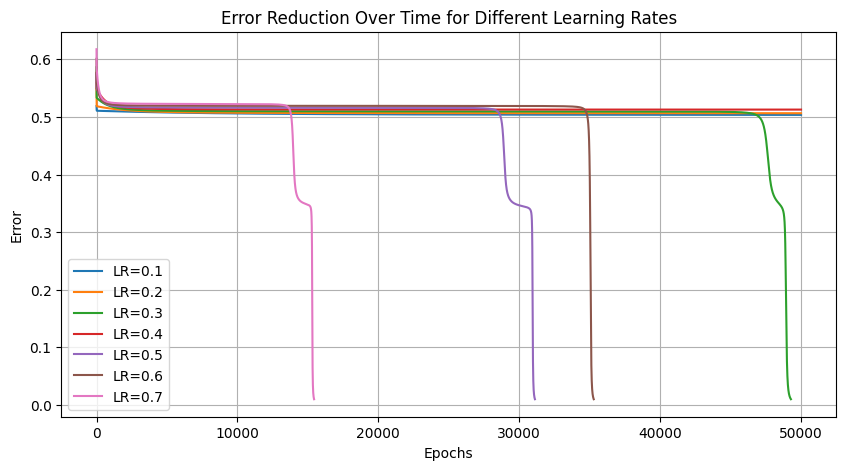

Two Layer, 6 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 20235


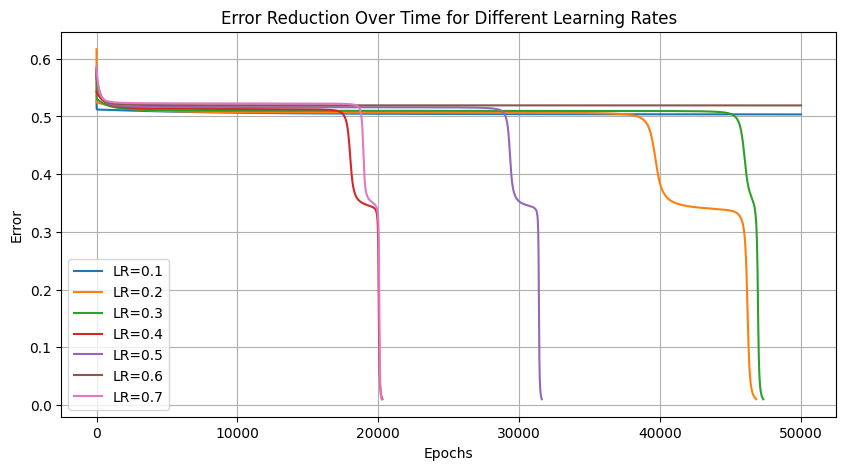

Two Layer, 6 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


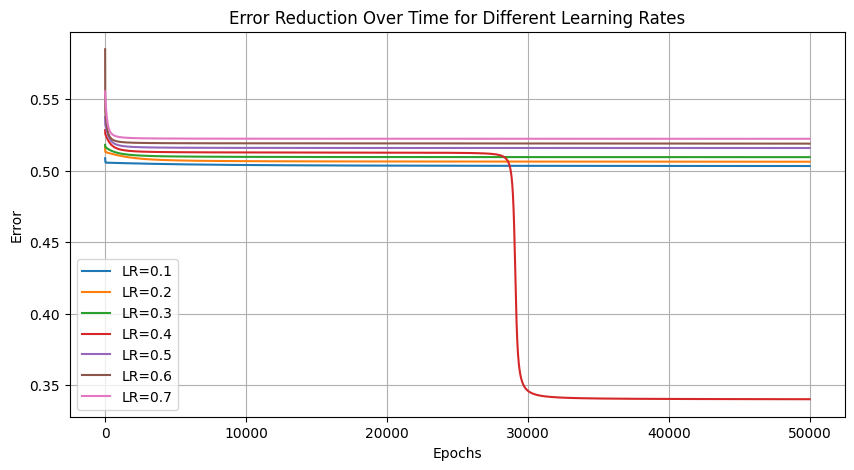

Two Layer, 6 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 43331


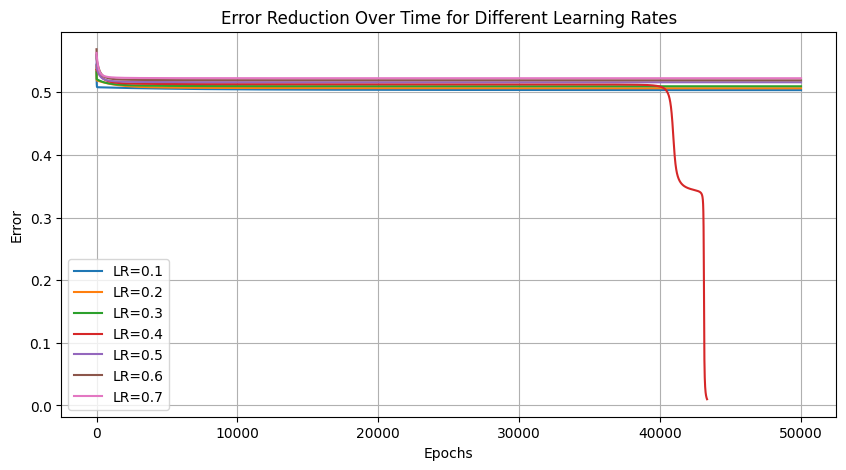

Two Layer, 6 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.2, Best epoch: 30562


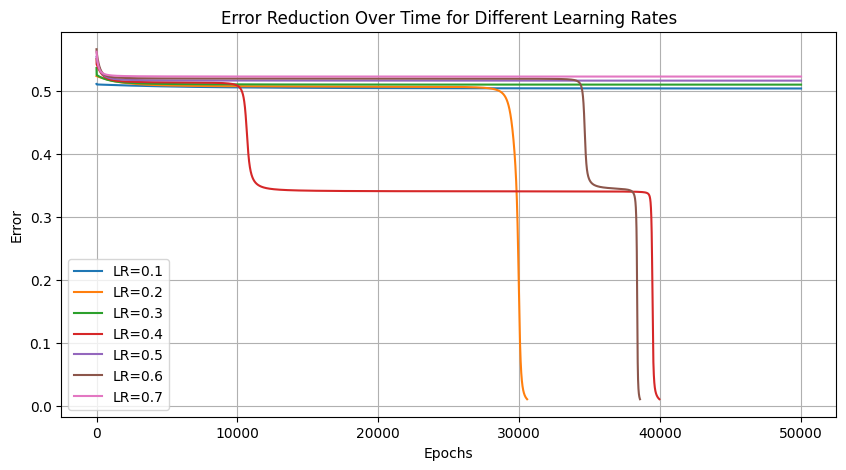

Two Layer, 6 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 17898


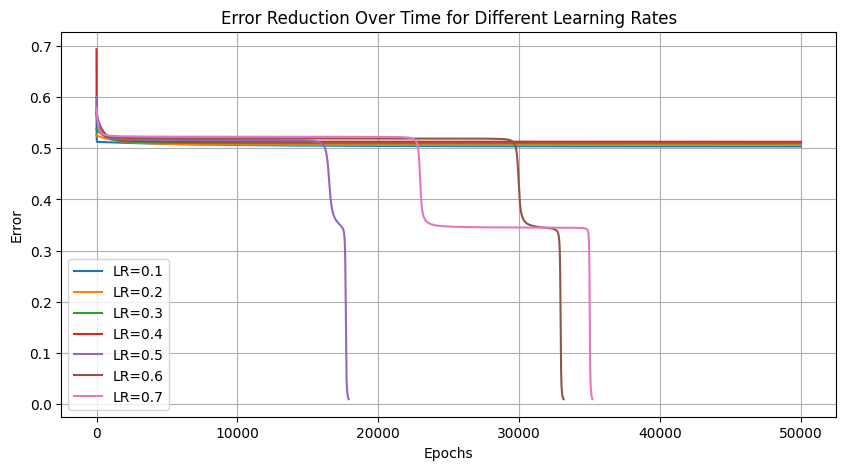

Two Layer, 6 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.3, Best epoch: 38215


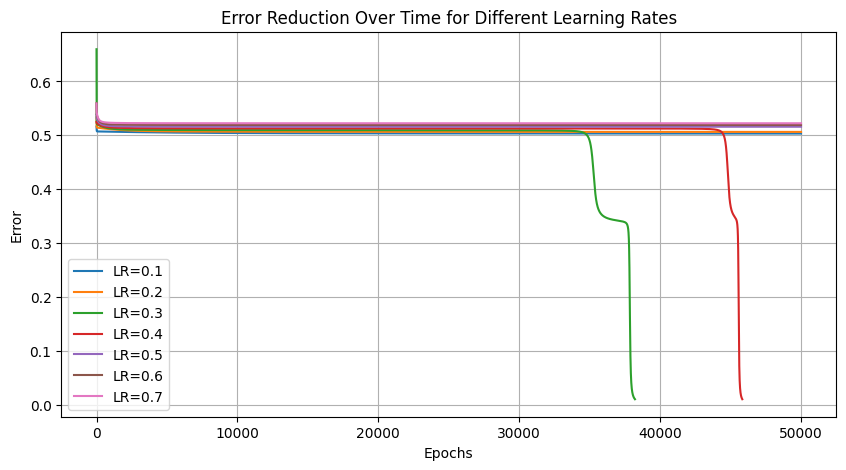

Two Layer, 6 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


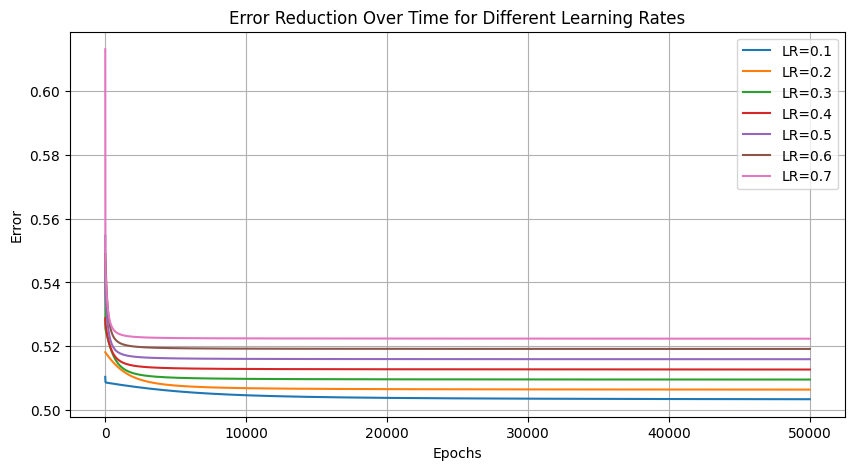

Two Layer, 6 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 23971


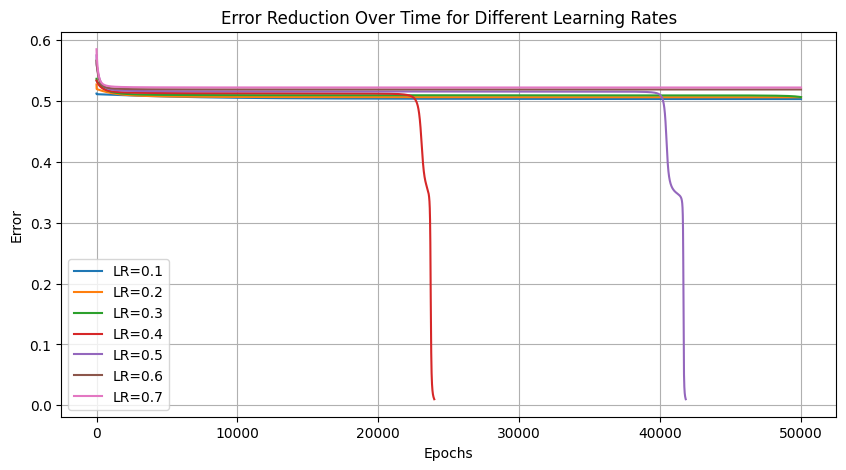

Two Layer, 6 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 23443


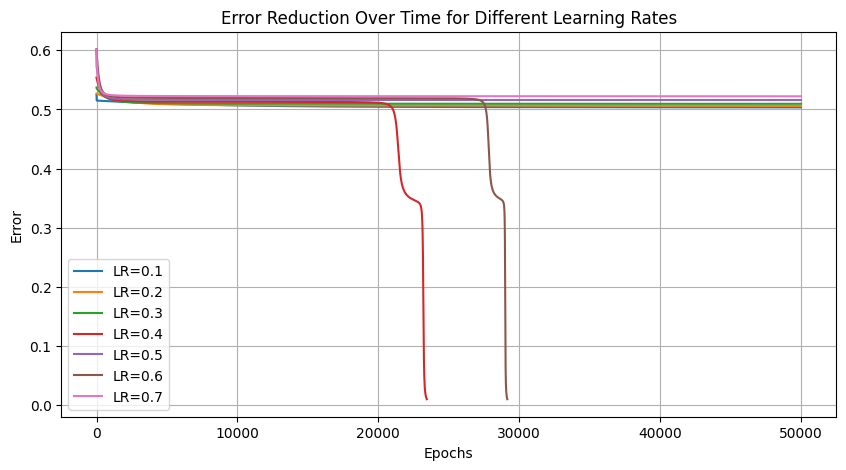

Two Layer, 8 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


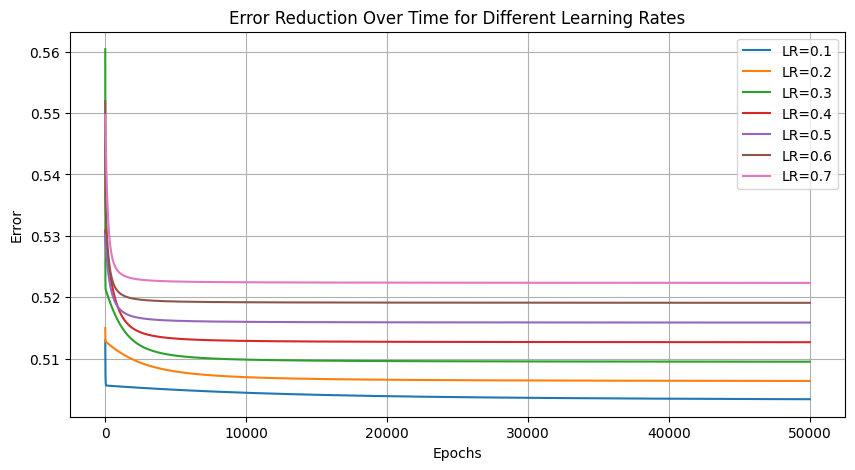

Two Layer, 8 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 26613


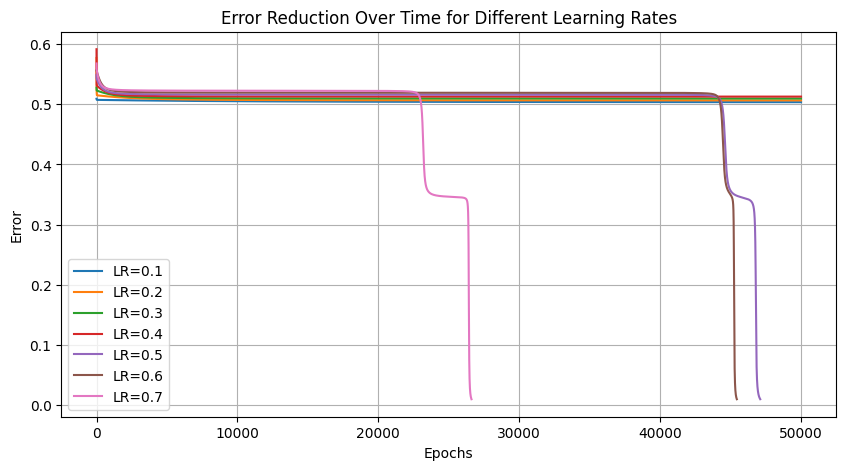

Two Layer, 8 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.3, Best epoch: 35372


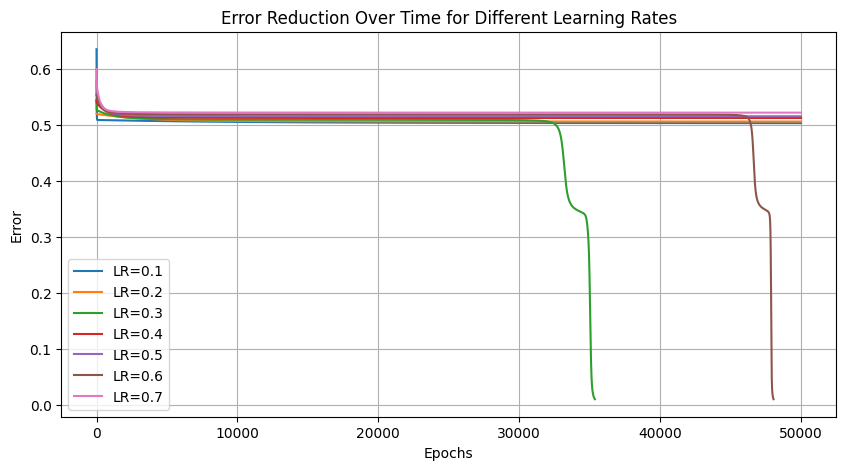

Two Layer, 8 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 25037


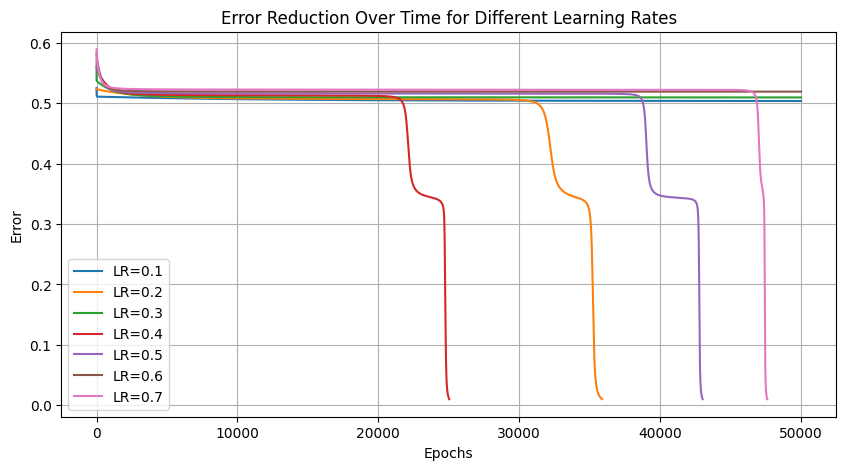

Two Layer, 8 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


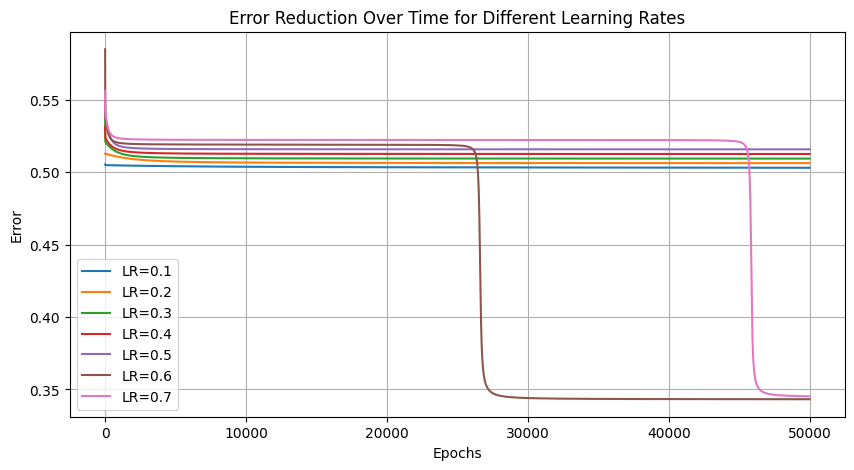

Two Layer, 8 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 44000


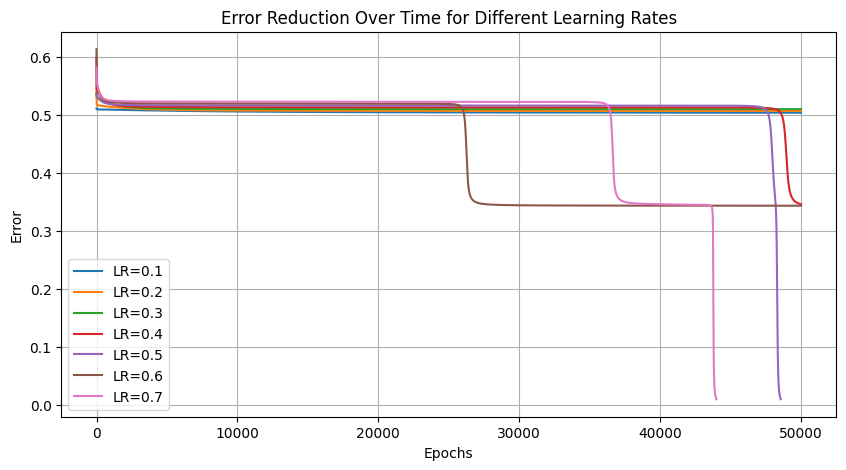

Two Layer, 8 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 36525


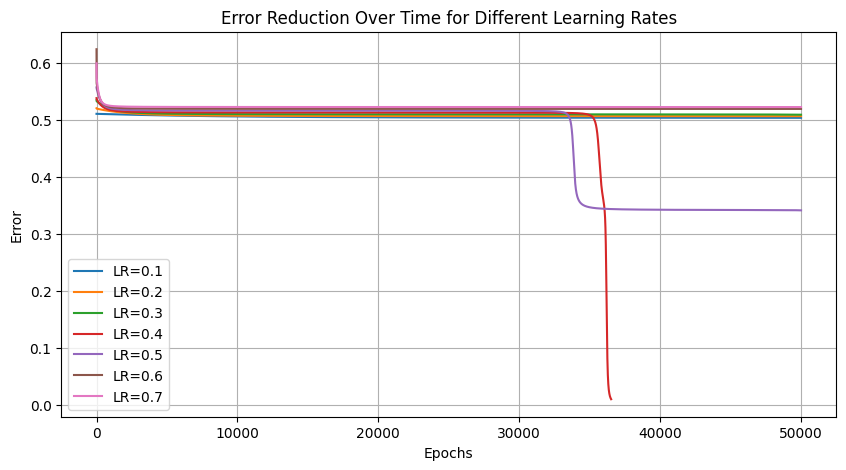

Two Layer, 8 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 17882


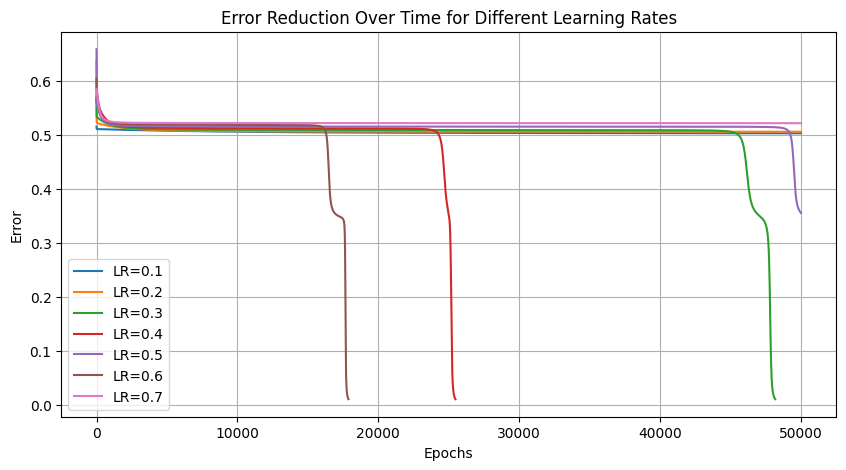

Two Layer, 8 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 27733


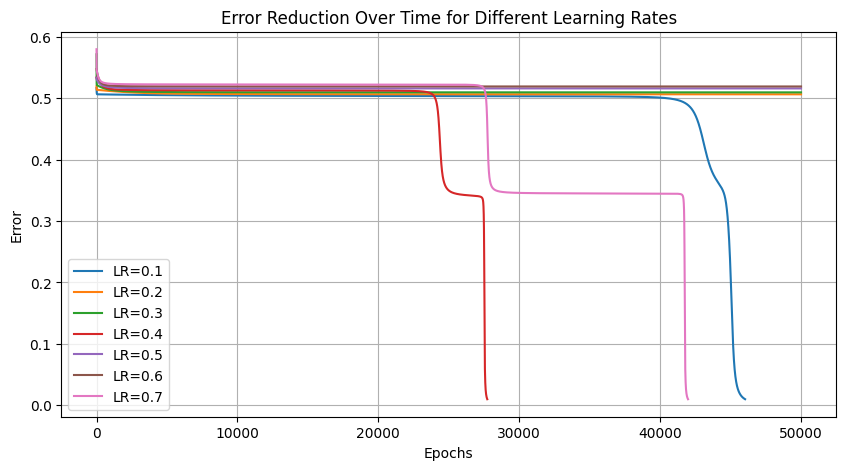

Two Layer, 8 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.2, Best epoch: 44932


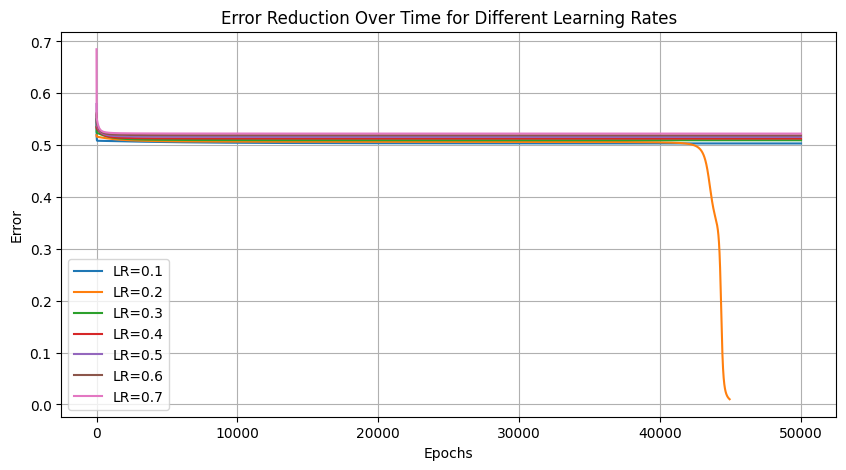

Two Layer, 8 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 24297


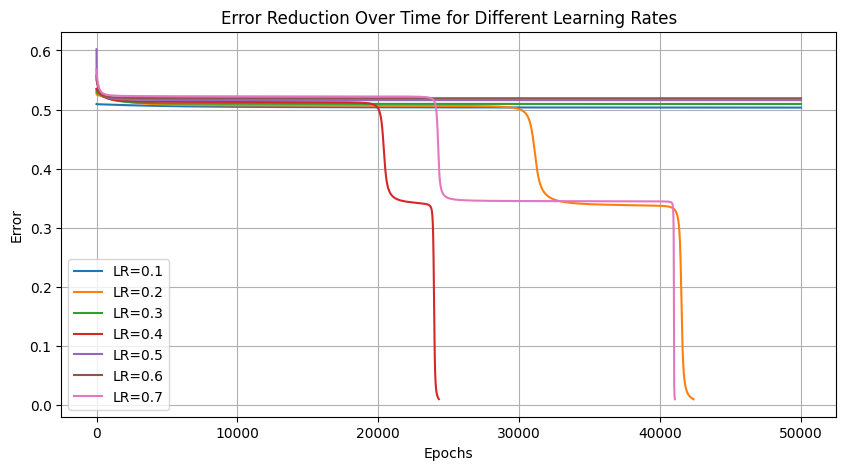

Two Layer, 8 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 28069


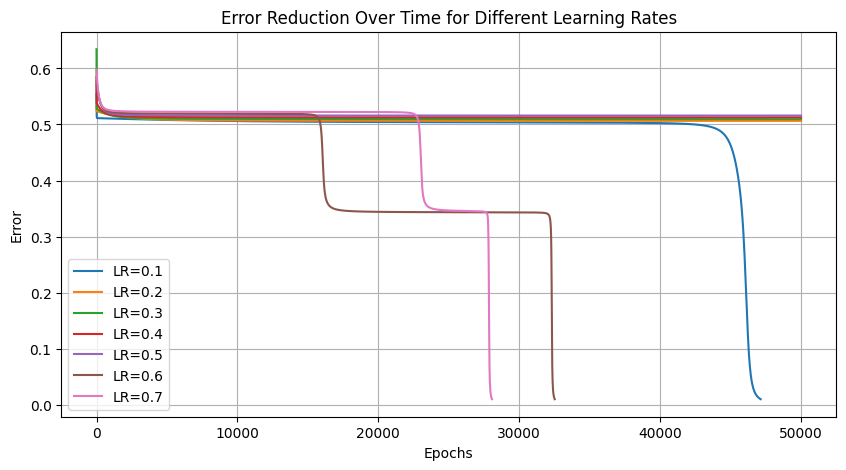

Two Layer, 8 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


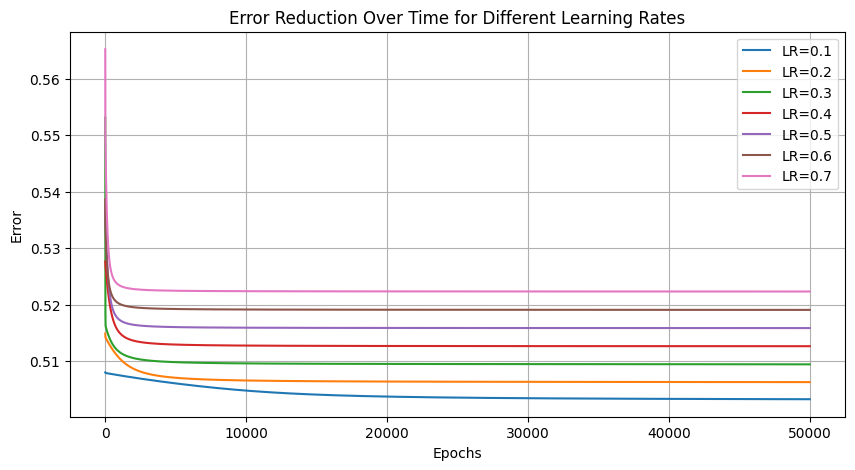

Two Layer, 8 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


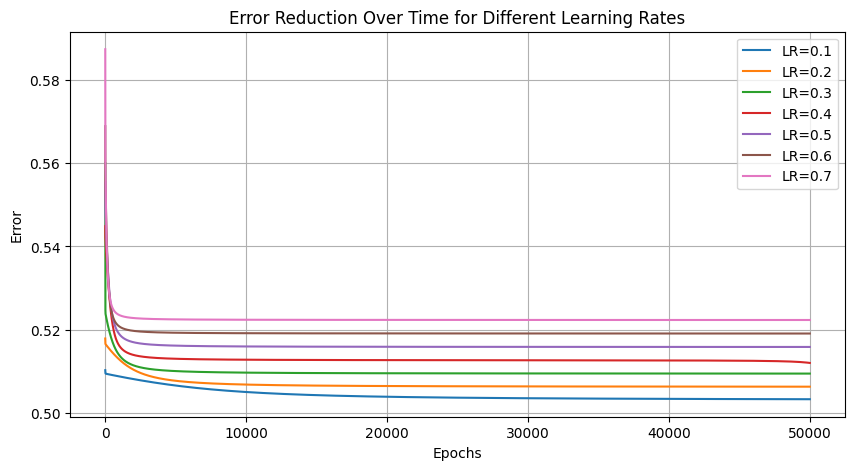

Two Layer, 8 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.2, Best epoch: 25892


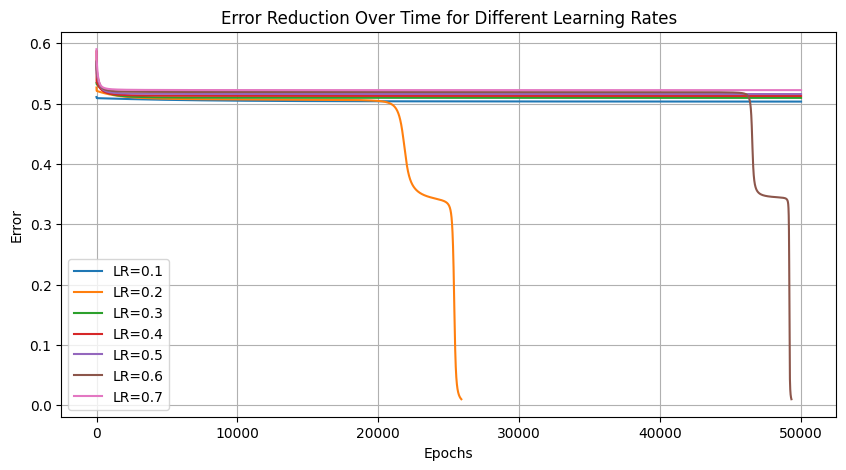

Two Layer, 8 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 26483


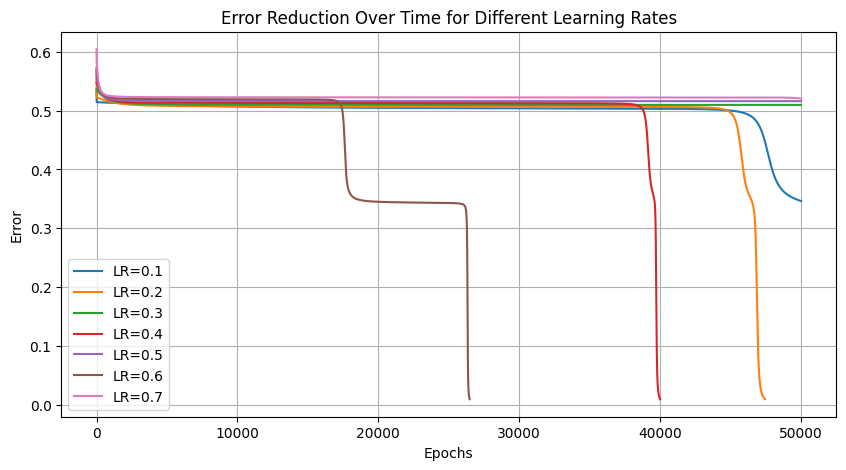

Two Layer, 10 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 31247


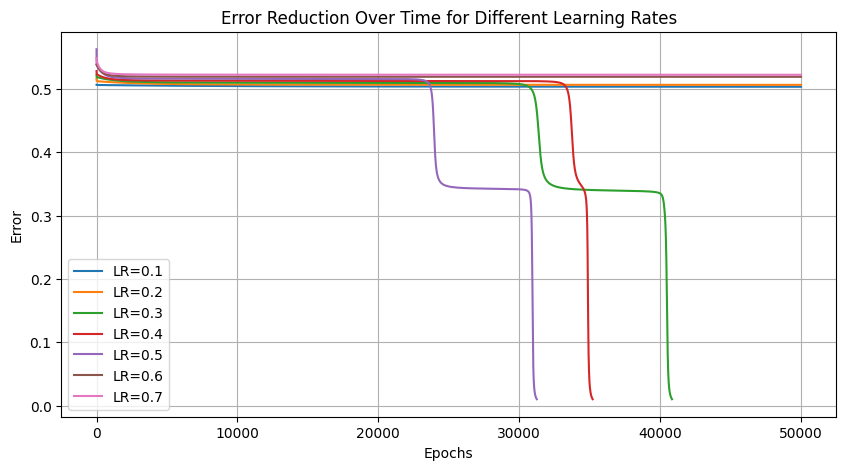

Two Layer, 10 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 19565


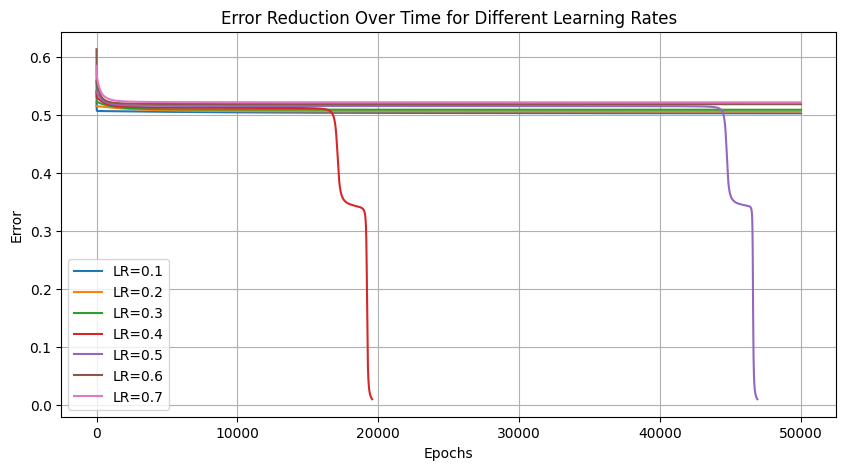

Two Layer, 10 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.2, Best epoch: 42257


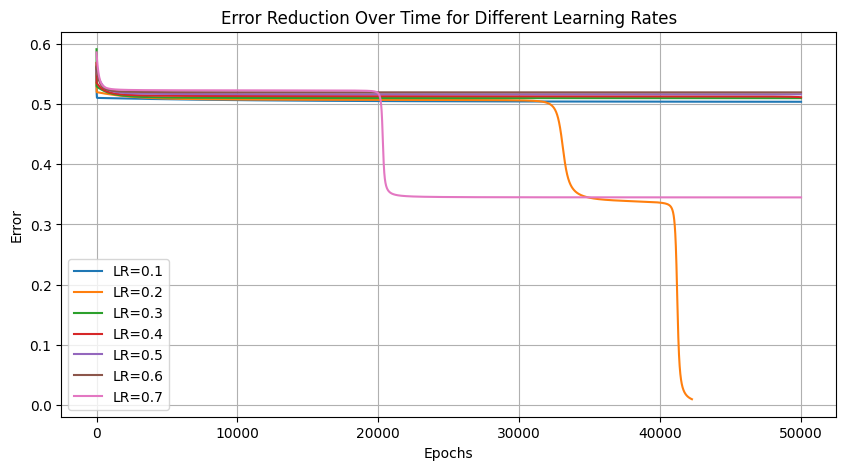

Two Layer, 10 nuerons in first hidden, 4 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 19593


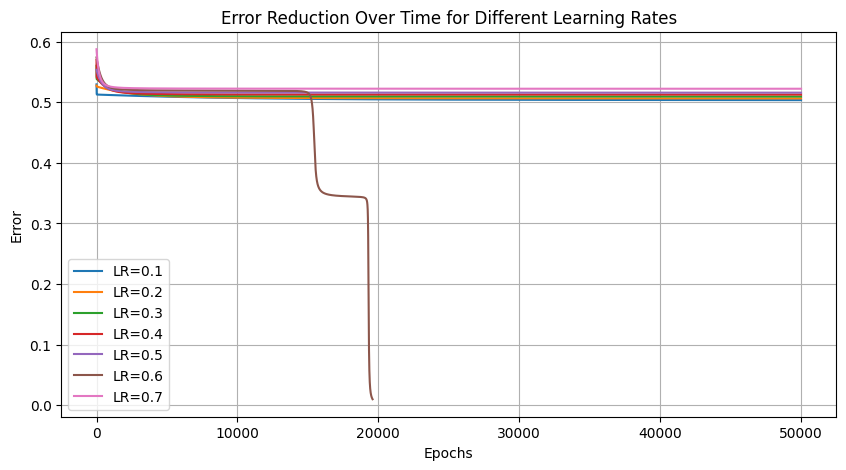

Two Layer, 10 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


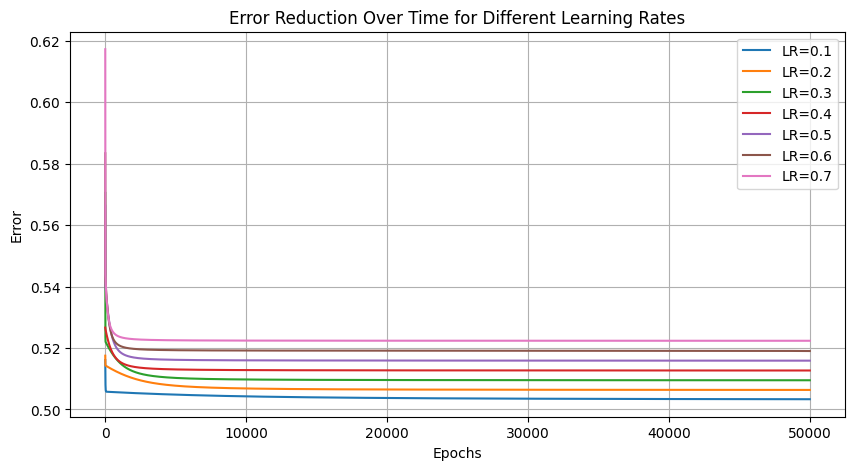

Two Layer, 10 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 34917


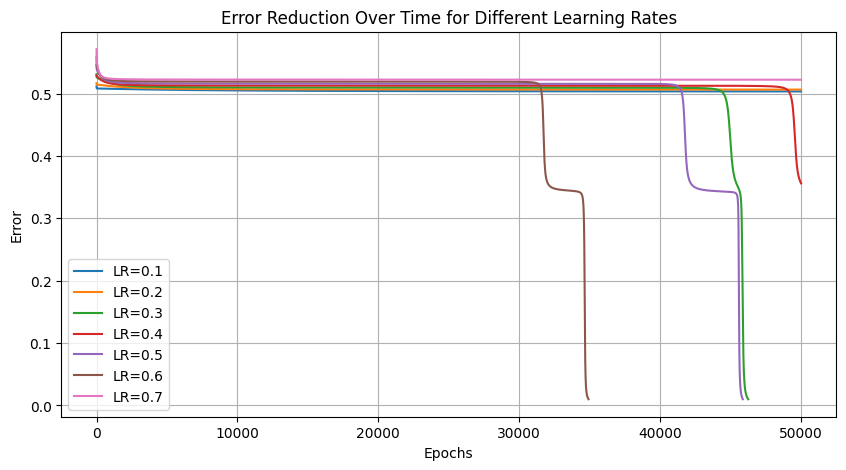

Two Layer, 10 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.4, Best epoch: 28605


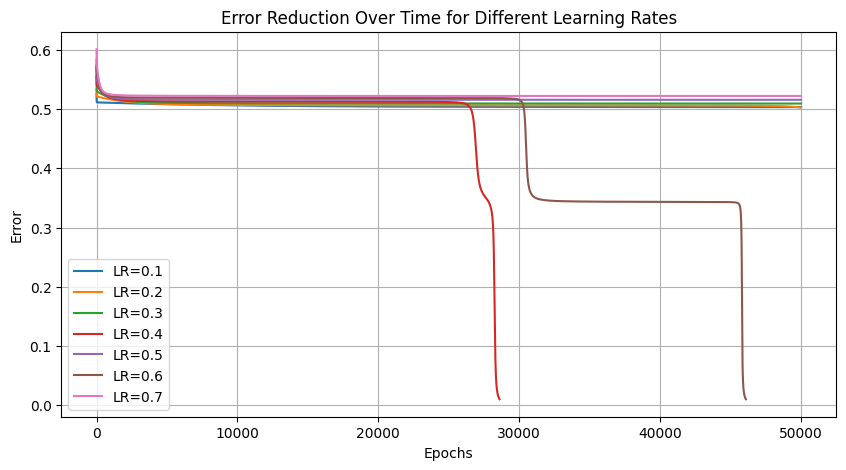

Two Layer, 10 nuerons in first hidden, 6 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


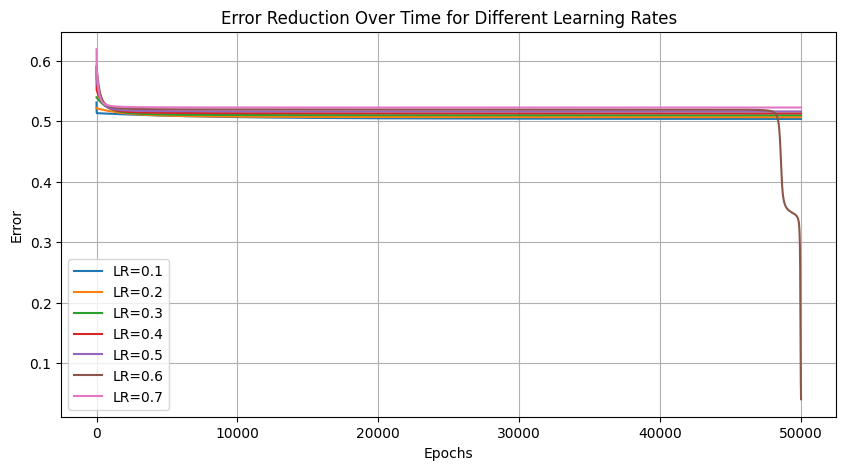

Two Layer, 10 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 42085


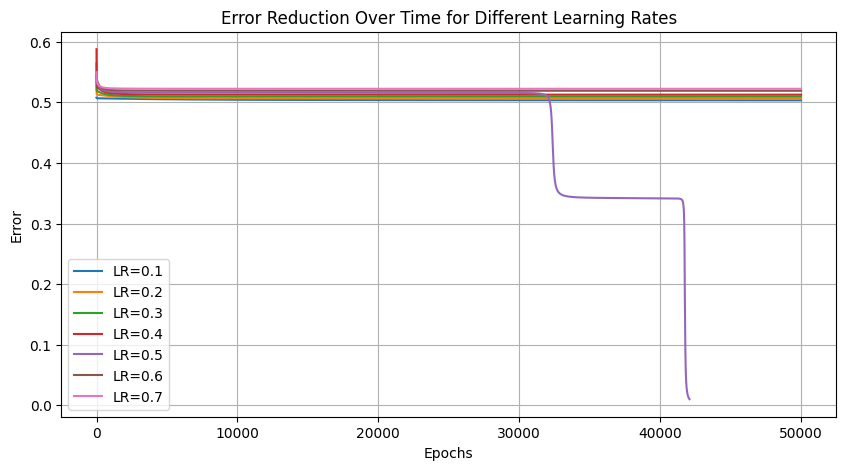

Two Layer, 10 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 36554


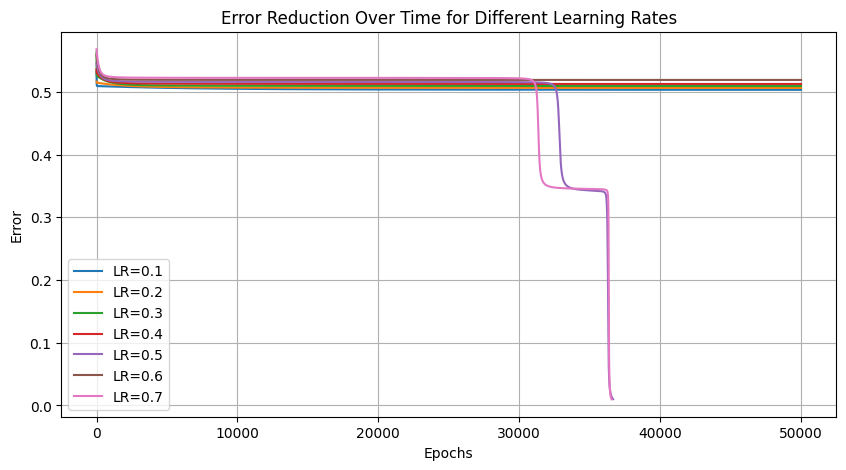

Two Layer, 10 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.7, Best epoch: 36694


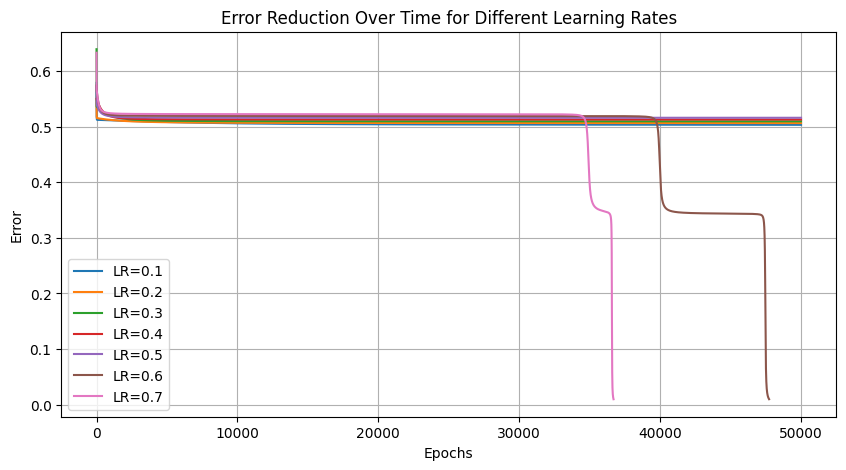

Two Layer, 10 nuerons in first hidden, 8 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 14979


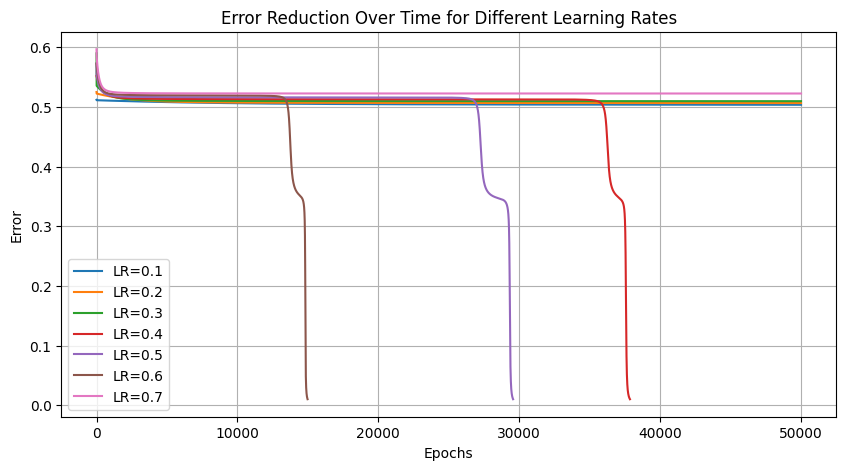

Two Layer, 10 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 38212


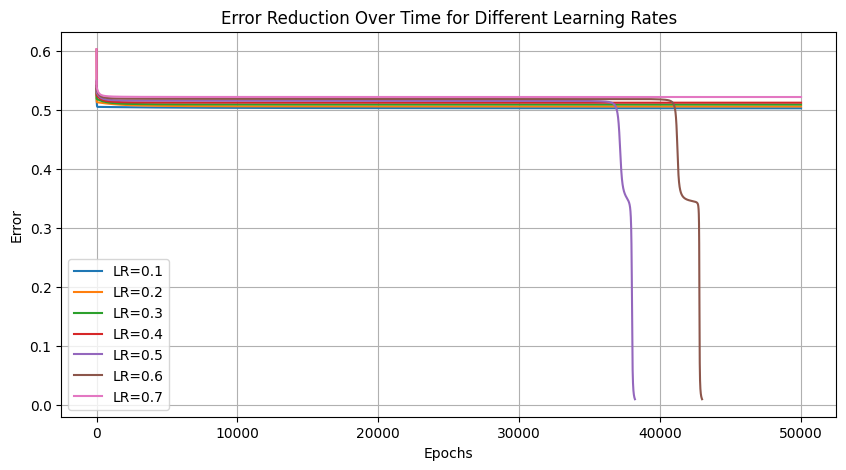

Two Layer, 10 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.5, Best epoch: 32376


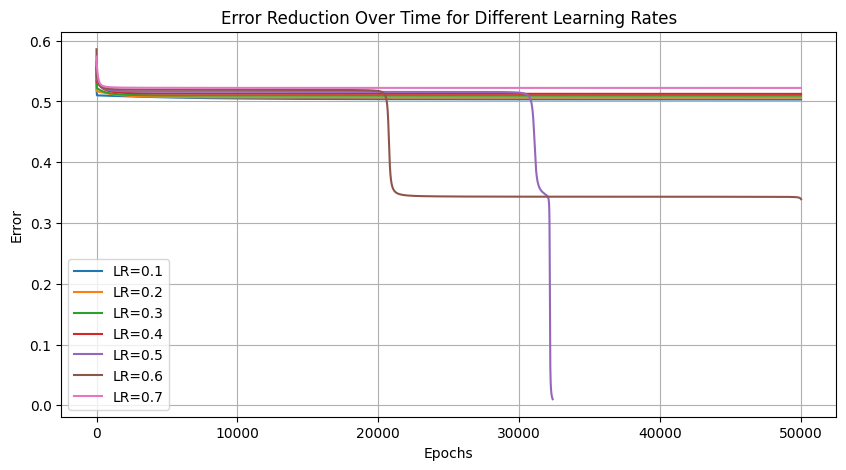

Two Layer, 10 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.1, Best epoch: 50001


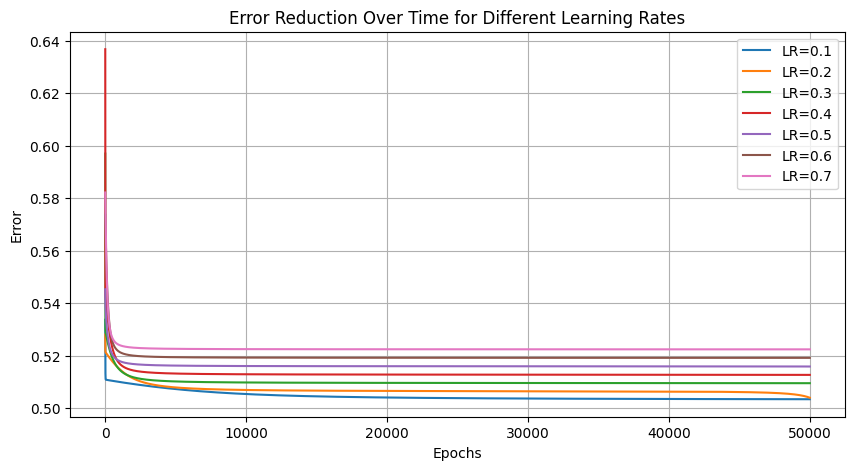

Two Layer, 10 nuerons in first hidden, 10 nuerons in second hidden
Best learning rate: 0.6, Best epoch: 22641


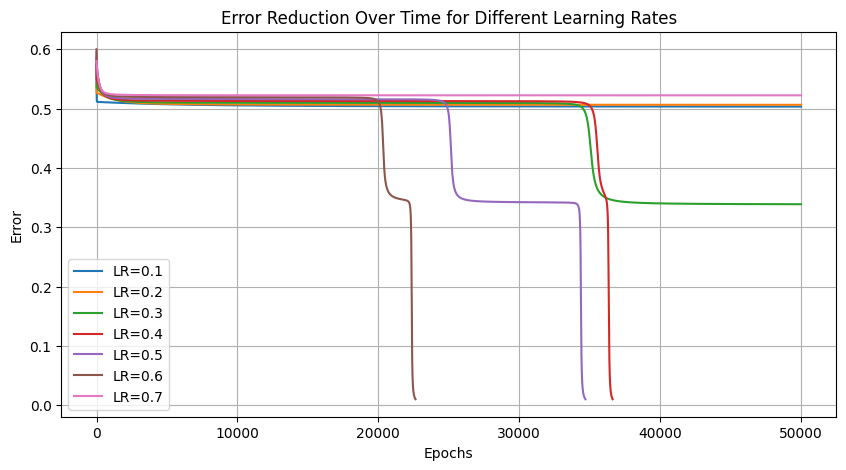

In [ ]:
for first_nueron in [4, 6, 8, 10]:
  for second_nueron in [4, 6, 8, 10]:
    for third_nueron in [4, 6, 8, 10]:
      layer_sizes = [3, first_nueron, second_nueron, third_nueron, 1]  # 3 input, 5 in first hidden, 3 in second hidden, 1 output
      inputs = np.array([[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
      desired_outputs = np.array([0, 1, 1, 0])
      learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

      best_learning_rate = None
      best_epoch = float("inf")
      error_histories = {}
      final_epochs = {}

      for lr in learning_rates:
          _, error_history, final_epoch = train_network(inputs, desired_outputs, layer_sizes, learning_rate=lr)
          final_epochs[lr] = final_epoch
          error_histories[lr] = error_history
          if final_epoch < best_epoch:
              best_epoch = final_epoch
              best_learning_rate = lr

      print(f"Two Layer, {first_nueron} nuerons in first hidden layer, {second_nueron} nuerons in second hidden layer, {third_nueron} nuerons in third hidden layer")
      print(f"Best learning rate: {best_learning_rate}, Best epoch: {best_epoch}")

      # Plot error histories for each learning rate
      plot_error_history(error_histories)